In [2]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [3]:
dataset = pd.read_csv('train.csv')
testset = pd.read_csv('test.csv')

In [4]:
dataset.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2.0,1.0,1.0,0.641791,0.581818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,5,1,A1,26,0.076923,2.0,3.0,1.0,0.059701,0.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,6,1,E1,26,0.076923,2.0,3.0,1.0,0.029851,0.745455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
3,7,1,D4,10,0.487179,2.0,3.0,1.0,0.164179,0.672727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
4,8,1,D2,26,0.230769,2.0,3.0,1.0,0.417910,0.654545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [5]:
dataset.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,56019.000000,56019.000000,56019.000000,56018.000000,56018.000000,56018.000000,56018.000000,56018.000000,56018.000000,56018.000000,...,56018.000000,56018.000000,56018.000000,56018.000000,56018.000000,56018.000000,56018.000000,56018.000000,56018.000000,56018.000000
mean,37263.431764,1.026420,24.419465,0.328905,2.006980,2.673248,1.043379,0.405707,0.707217,0.292658,...,0.057124,0.010086,0.045628,0.010604,0.007676,0.013799,0.008390,0.019904,0.054875,5.635653
std,21512.312806,0.160381,5.068264,0.282420,0.083254,0.739423,0.291276,0.197152,0.074304,0.088980,...,0.232082,0.099922,0.208679,0.102428,0.087277,0.116657,0.091214,0.139673,0.227739,2.457492
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,18658.500000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,37293.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,55816.500000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,74624.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [6]:
# discovering columns with missing values

empty_cols = [i for i in dataset.columns if dataset[i].isnull().any()]
empty_cols

['Product_Info_4',
 'Product_Info_5',
 'Product_Info_6',
 'Product_Info_7',
 'Ins_Age',
 'Ht',
 'Wt',
 'BMI',
 'Employment_Info_1',
 'Employment_Info_2',
 'Employment_Info_3',
 'Employment_Info_4',
 'Employment_Info_5',
 'Employment_Info_6',
 'InsuredInfo_1',
 'InsuredInfo_2',
 'InsuredInfo_3',
 'InsuredInfo_4',
 'InsuredInfo_5',
 'InsuredInfo_6',
 'InsuredInfo_7',
 'Insurance_History_1',
 'Insurance_History_2',
 'Insurance_History_3',
 'Insurance_History_4',
 'Insurance_History_5',
 'Insurance_History_7',
 'Insurance_History_8',
 'Insurance_History_9',
 'Family_Hist_1',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Family_Hist_5',
 'Medical_History_1',
 'Medical_History_2',
 'Medical_History_3',
 'Medical_History_4',
 'Medical_History_5',
 'Medical_History_6',
 'Medical_History_7',
 'Medical_History_8',
 'Medical_History_9',
 'Medical_History_10',
 'Medical_History_11',
 'Medical_History_12',
 'Medical_History_13',
 'Medical_History_14',
 'Medical_History_15',
 'Medical_Hist

In [7]:
# there can be 3 ways to repopulate missing values
# without considering outliers or exceptional cases

# the method being mean, median and mode

# mean and median for float values and integers - category 1
# mode is ideal for categorical data - category 2

In [8]:
# category 1

dataset['Employment_Info_1'] = dataset['Employment_Info_1'].fillna(dataset['Employment_Info_1'].mean())
dataset['Employment_Info_4'] = dataset['Employment_Info_4'].fillna(dataset['Employment_Info_4'].mean())
dataset['Employment_Info_6'] = dataset['Employment_Info_6'].fillna(dataset['Employment_Info_6'].mean())

dataset['Family_Hist_2'] = dataset['Family_Hist_2'].fillna(dataset['Family_Hist_2'].mean())
dataset['Family_Hist_3'] = dataset['Family_Hist_3'].fillna(dataset['Family_Hist_3'].mean())
dataset['Family_Hist_4'] = dataset['Family_Hist_4'].fillna(dataset['Family_Hist_4'].mean())
dataset['Family_Hist_5'] = dataset['Family_Hist_5'].fillna(dataset['Family_Hist_5'].mean())

In [9]:
# category 2

dataset['Medical_History_1'] = dataset['Medical_History_1'].fillna(dataset['Medical_History_1'].mode())
dataset['Medical_History_10'] = dataset['Medical_History_10'].fillna(dataset['Medical_History_10'].mode())
dataset['Medical_History_15'] = dataset['Medical_History_15'].fillna(dataset['Medical_History_15'].mode())
dataset['Medical_History_24'] = dataset['Medical_History_24'].fillna(dataset['Medical_History_24'].mode())
dataset['Medical_History_32'] = dataset['Medical_History_32'].fillna(dataset['Medical_History_32'].mode())

In [10]:
# studying multicollinearity can help us discard similar variables

# the technique that we shall use to solve multi-collinearity is Variance Inflation Factor (VIF)

# we shall derive a table while calculating the VIF for each feature
# features with similar VIF are highly correlated

In [11]:
print(dataset.corr())


                          Id  Product_Info_1  Product_Info_3  Product_Info_4  \
Id                  1.000000       -0.002535       -0.000695       -0.003616   
Product_Info_1     -0.002535        1.000000        0.027895        0.060235   
Product_Info_3     -0.000695        0.027895        1.000000        0.048344   
Product_Info_4     -0.003616        0.060235        0.048344        1.000000   
Product_Info_5     -0.004139        0.069080        0.025130        0.041249   
...                      ...             ...             ...             ...   
Medical_Keyword_45  0.001381       -0.006128       -0.053207       -0.020676   
Medical_Keyword_46  0.000920       -0.012712       -0.000198       -0.047709   
Medical_Keyword_47  0.001318        0.003619       -0.017720       -0.022858   
Medical_Keyword_48  0.001761       -0.010369        0.045264       -0.030519   
Response           -0.000295        0.014867       -0.068658        0.201802   

                    Product_Info_5  Pro

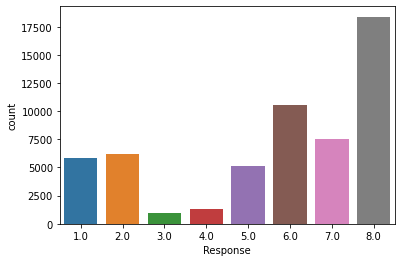

In [13]:
sns.countplot(x=dataset['Response']);

In [12]:
dataset['Response'].value_counts()
dataset.drop('Id',axis=1,inplace=True)

In [20]:
dataset.drop('Product_Info_2',axis=1,inplace=True)

In [33]:
columns =  [col for col in dataset.columns]
columns
columns.remove("Response")

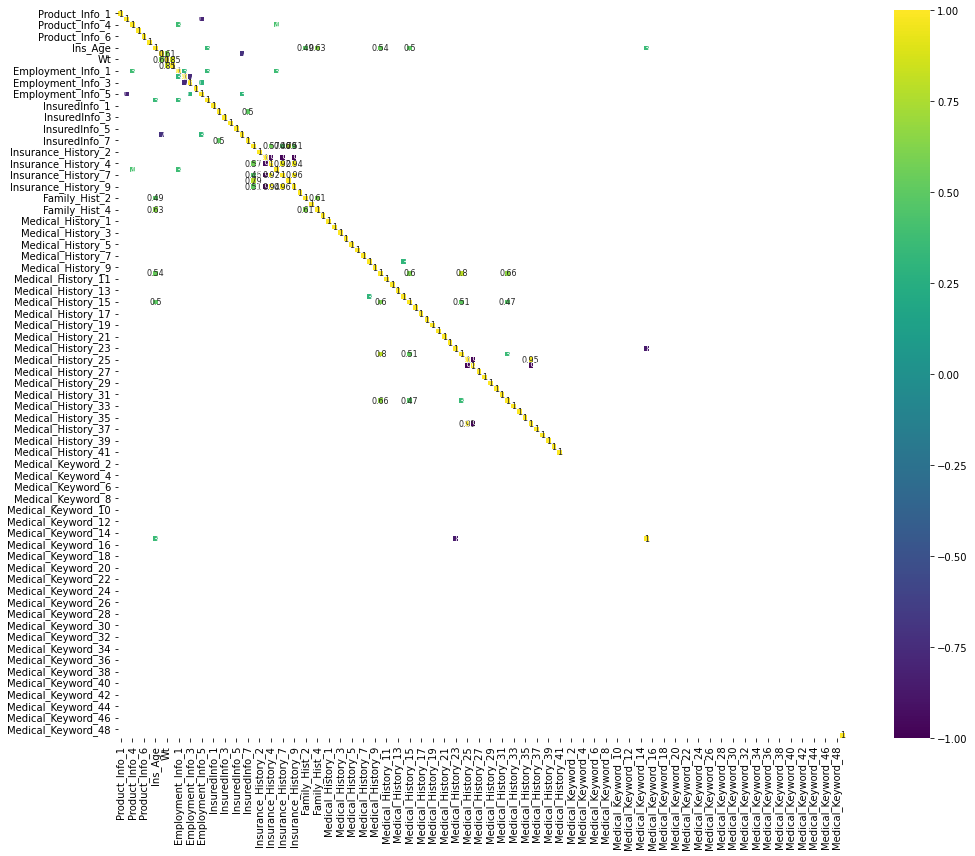

In [34]:
#create a correlation matrix
corr = dataset.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.7)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.tight_layout()
plt.show()

In [35]:
corr

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Product_Info_1,1.000000,0.027322,0.060235,0.069080,-0.080145,0.011381,-0.078003,0.051845,-0.004192,-0.036864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014867
Product_Info_3,0.027322,1.000000,0.053172,0.025505,-0.019633,0.017012,0.004859,0.292551,0.216647,0.087870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.067100
Product_Info_4,0.060235,0.053172,1.000000,0.041249,-0.091263,0.049977,-0.261962,0.141159,-0.027827,-0.128614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201802
Product_Info_5,0.069080,0.025505,0.041249,1.000000,-0.047048,0.016955,0.006472,0.054530,0.022756,-0.004861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002490
Product_Info_6,-0.080145,-0.019633,-0.091263,-0.047048,1.000000,-0.015069,-0.031060,-0.031797,0.014713,0.038651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.028284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Medical_Keyword_45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medical_Keyword_46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medical_Keyword_47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medical_Keyword_48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#columns are barely multicollinear so we can't drop the columns

Column:  Product_Info_1


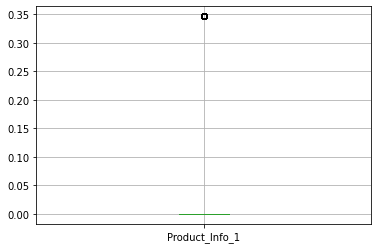

count    56019.000000
mean         0.009156
std          0.055584
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.346574
Name: Product_Info_1, dtype: float64
Skewness:  5.90590214358363


Column:  Product_Info_3


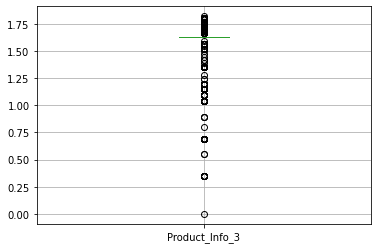

count    56019.000000
mean         1.579959
std          0.151183
min          0.000000
25%          1.629048
50%          1.629048
75%          1.629048
max          1.818793
Name: Product_Info_3, dtype: float64
Skewness:  -2.631452103028536


Column:  Product_Info_4


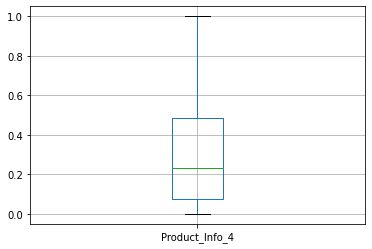

count    56018.000000
mean         0.328905
std          0.282420
min          0.000000
25%          0.076923
50%          0.230769
75%          0.487179
max          1.000000
Name: Product_Info_4, dtype: float64
Skewness:  1.2207535733198003


Column:  Product_Info_5


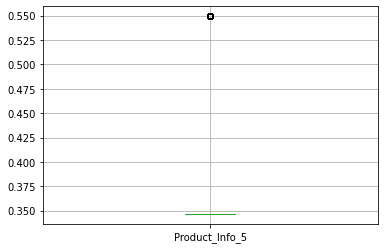

count    56018.000000
mean         0.347989
std          0.016878
min          0.346574
25%          0.346574
50%          0.346574
75%          0.346574
max          0.549306
Name: Product_Info_5, dtype: float64
Skewness:  11.844116001877655


Column:  Product_Info_6


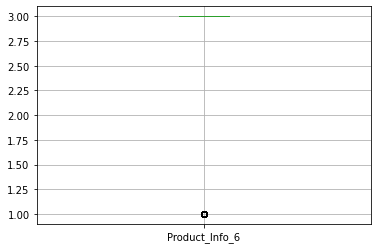

count    56018.000000
mean         2.673248
std          0.739423
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Product_Info_6, dtype: float64
Skewness:  -1.8210726684138985


Column:  Product_Info_7


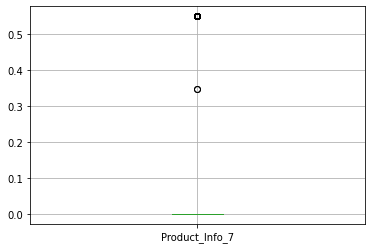

count    56018.000000
mean         0.011917
std          0.080010
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.549306
Name: Product_Info_7, dtype: float64
Skewness:  6.56622177741225


Column:  Ins_Age


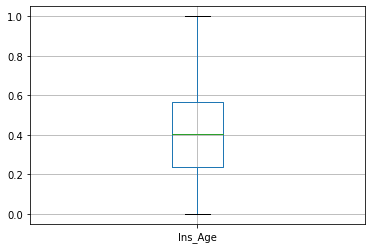

count    56018.000000
mean         0.405707
std          0.197152
min          0.000000
25%          0.238806
50%          0.402985
75%          0.567164
max          1.000000
Name: Ins_Age, dtype: float64
Skewness:  0.021625527513519174


Column:  Ht


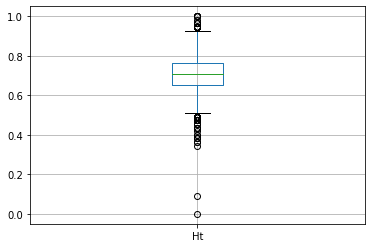

count    56018.000000
mean         0.707217
std          0.074304
min          0.000000
25%          0.654545
50%          0.709091
75%          0.763636
max          1.000000
Name: Ht, dtype: float64
Skewness:  -0.08614541258939064


Column:  Wt


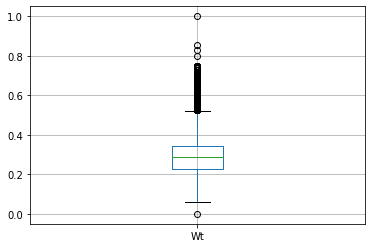

count    56018.000000
mean         0.292658
std          0.088980
min          0.000000
25%          0.225941
50%          0.288703
75%          0.345188
max          1.000000
Name: Wt, dtype: float64
Skewness:  0.680184185754782


Column:  BMI


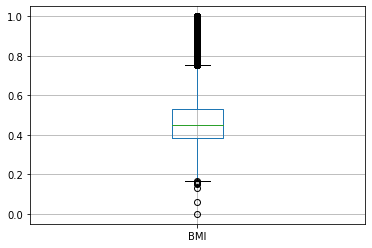

count    56018.000000
mean         0.469668
std          0.122225
min          0.000000
25%          0.385884
50%          0.451602
75%          0.532858
max          1.000000
Name: BMI, dtype: float64
Skewness:  0.9430829032135919


Column:  Employment_Info_1


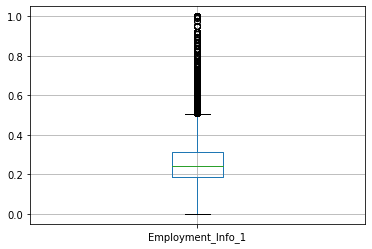

count    56019.000000
mean         0.250048
std          0.122110
min          0.000000
25%          0.187083
50%          0.244949
75%          0.315824
max          1.000000
Name: Employment_Info_1, dtype: float64
Skewness:  0.8711670021829899


Column:  Employment_Info_2


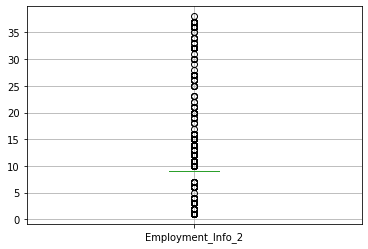

count    56018.000000
mean         8.645614
std          4.223018
min          1.000000
25%          9.000000
50%          9.000000
75%          9.000000
max         38.000000
Name: Employment_Info_2, dtype: float64
Skewness:  0.5531523733700401


Column:  Employment_Info_3


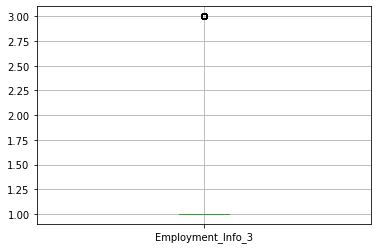

count    56018.000000
mean         1.300296
std          0.714440
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Employment_Info_3, dtype: float64
Skewness:  1.9588183079667412


Column:  Employment_Info_4


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


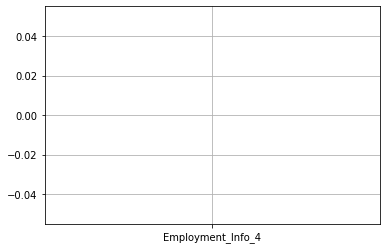

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56019.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Employment_Info_4, dtype: float64
Skewness:  nan


Column:  Employment_Info_5


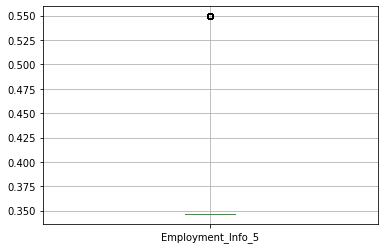

count    56018.000000
mean         0.375461
std          0.070866
min          0.346574
25%          0.346574
50%          0.346574
75%          0.346574
max          0.549306
Name: Employment_Info_5, dtype: float64
Skewness:  2.045588356766269


Column:  Employment_Info_6


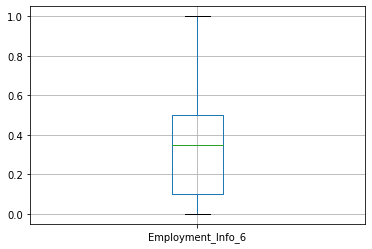

count    56019.000000
mean         0.361439
std          0.316065
min          0.000000
25%          0.100000
50%          0.350000
75%          0.500000
max          1.000000
Name: Employment_Info_6, dtype: float64
Skewness:  0.870075392770254


Column:  InsuredInfo_1


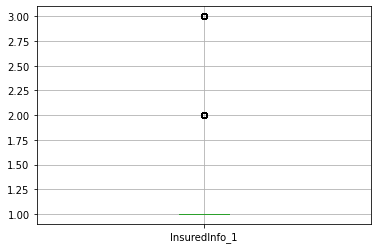

count    56018.00000
mean         1.20879
std          0.41754
min          1.00000
25%          1.00000
50%          1.00000
75%          1.00000
max          3.00000
Name: InsuredInfo_1, dtype: float64
Skewness:  1.619847884359691


Column:  InsuredInfo_2


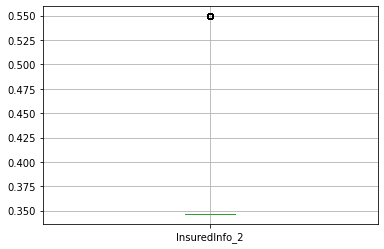

count    56018.000000
mean         0.348054
std          0.017260
min          0.346574
25%          0.346574
50%          0.346574
75%          0.346574
max          0.549306
Name: InsuredInfo_2, dtype: float64
Skewness:  11.574880351176962


Column:  InsuredInfo_3


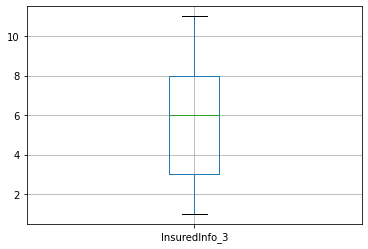

count    56018.000000
mean         5.840962
std          2.672595
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: InsuredInfo_3, dtype: float64
Skewness:  0.10575000237291043


Column:  InsuredInfo_4


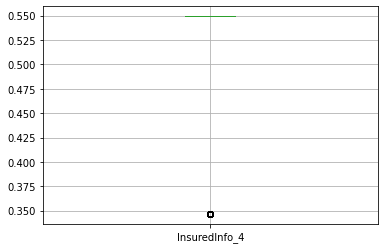

count    56018.000000
mean         0.525710
std          0.065016
min          0.346574
25%          0.549306
50%          0.549306
75%          0.549306
max          0.549306
Name: InsuredInfo_4, dtype: float64
Skewness:  -2.392435331245342


Column:  InsuredInfo_5


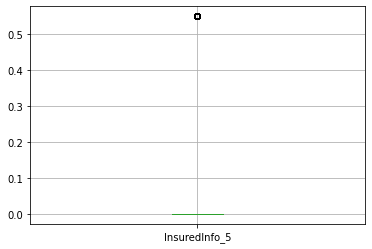

count    56018.000000
mean         0.007600
std          0.064162
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.549306
Name: InsuredInfo_5, dtype: float64
Skewness:  8.324603923454642


Column:  InsuredInfo_6


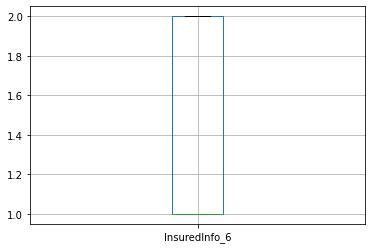

count    56018.000000
mean         1.409297
std          0.491709
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: InsuredInfo_6, dtype: float64
Skewness:  0.3689430637331387


Column:  InsuredInfo_7


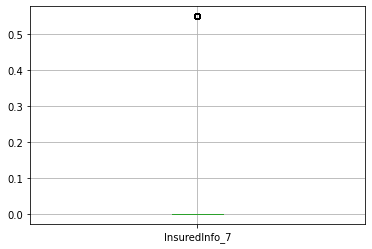

count    56018.000000
mean         0.010600
std          0.075568
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.549306
Name: InsuredInfo_7, dtype: float64
Skewness:  6.988764508030463


Column:  Insurance_History_1


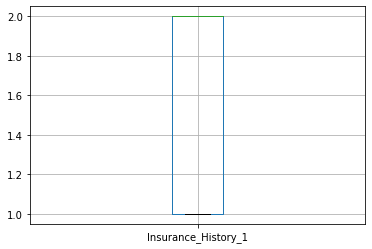

count    56018.000000
mean         1.727016
std          0.445497
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Insurance_History_1, dtype: float64
Skewness:  -1.019197320472296


Column:  Insurance_History_2


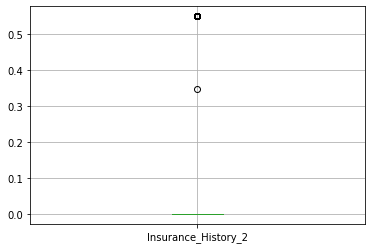

count    56018.000000
mean         0.015411
std          0.090702
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.549306
Name: Insurance_History_2, dtype: float64
Skewness:  5.715982950217595


Column:  Insurance_History_3


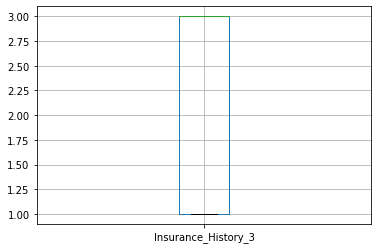

count    56018.000000
mean         2.147221
std          0.989103
min          1.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Insurance_History_3, dtype: float64
Skewness:  -0.2976927084395885


Column:  Insurance_History_4


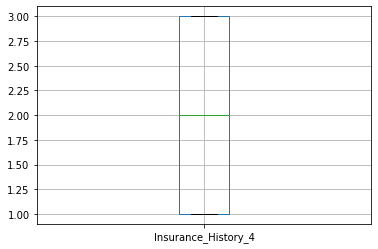

count    56018.000000
mean         1.958888
std          0.945489
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: Insurance_History_4, dtype: float64
Skewness:  0.08188999170577378


Column:  Insurance_History_5


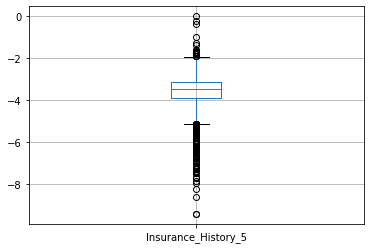

count    3.206800e+04
mean             -inf
std               NaN
min              -inf
25%     -3.912023e+00
50%     -3.474289e+00
75%     -3.107304e+00
max      0.000000e+00
Name: Insurance_History_5, dtype: float64
Skewness:  nan


Column:  Insurance_History_7


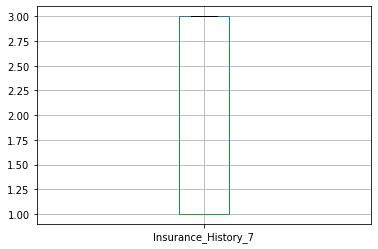

count    56018.000000
mean         1.901924
std          0.971074
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: Insurance_History_7, dtype: float64
Skewness:  0.1969229242435419


Column:  Insurance_History_8


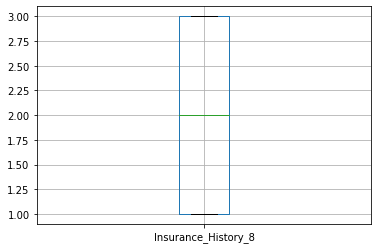

count    56018.000000
mean         2.047235
std          0.755330
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: Insurance_History_8, dtype: float64
Skewness:  -0.07824095777026678


Column:  Insurance_History_9


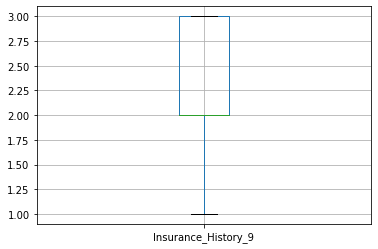

count    56018.000000
mean         2.419222
std          0.509491
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: Insurance_History_9, dtype: float64
Skewness:  0.14430316848155703


Column:  Family_Hist_1


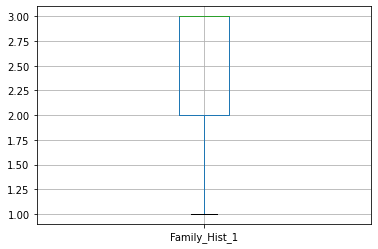

count    56018.000000
mean         2.686565
std          0.482936
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Family_Hist_1, dtype: float64
Skewness:  -1.0426469550391344


Column:  Family_Hist_2


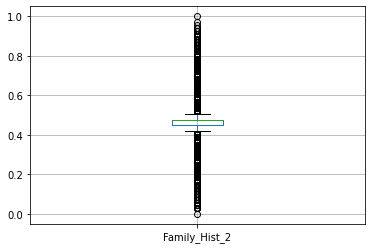

count    56019.000000
mean         0.474627
std          0.111625
min          0.000000
25%          0.449275
50%          0.474627
75%          0.474627
max          1.000000
Name: Family_Hist_2, dtype: float64
Skewness:  0.28696511301973743


Column:  Family_Hist_3


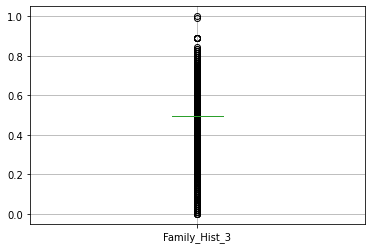

count    56019.000000
mean         0.497984
std          0.091315
min          0.000000
25%          0.497984
50%          0.497984
75%          0.497984
max          1.000000
Name: Family_Hist_3, dtype: float64
Skewness:  -0.8778144030803348


Column:  Family_Hist_4


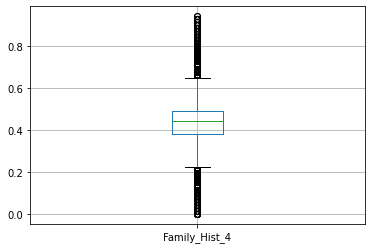

count    56019.000000
mean         0.444867
std          0.134228
min          0.000000
25%          0.380282
50%          0.444867
75%          0.492958
max          0.943662
Name: Family_Hist_4, dtype: float64
Skewness:  0.25317247701035317


Column:  Family_Hist_5


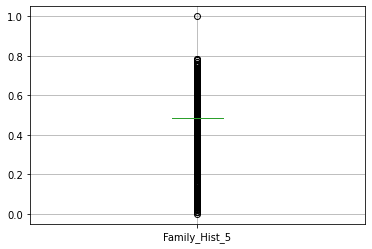

count    56019.000000
mean         0.484996
std          0.070186
min          0.000000
25%          0.484996
50%          0.484996
75%          0.484996
max          1.000000
Name: Family_Hist_5, dtype: float64
Skewness:  -1.3389755648692945


Column:  Medical_History_1


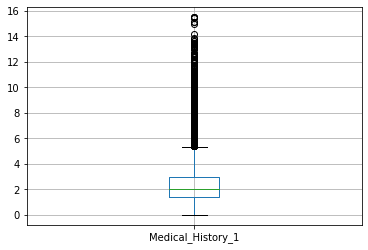

count    47641.000000
mean         2.302379
std          1.629348
min          0.000000
25%          1.414214
50%          2.000000
75%          3.000000
max         15.491933
Name: Medical_History_1, dtype: float64
Skewness:  1.5662244737248707


Column:  Medical_History_2


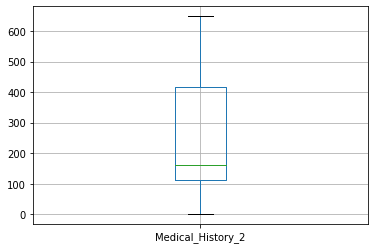

count    56018.000000
mean       253.593184
std        178.495914
min          1.000000
25%        112.000000
50%        162.000000
75%        416.000000
max        648.000000
Name: Medical_History_2, dtype: float64
Skewness:  0.5973544988810056


Column:  Medical_History_3


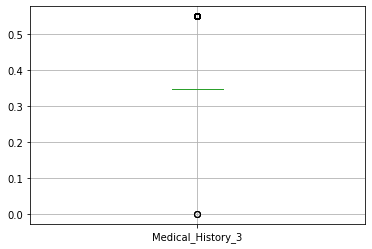

count    56018.000000
mean         0.367357
std          0.061578
min          0.000000
25%          0.346574
50%          0.346574
75%          0.346574
max          0.549306
Name: Medical_History_3, dtype: float64
Skewness:  2.601301118223002


Column:  Medical_History_4


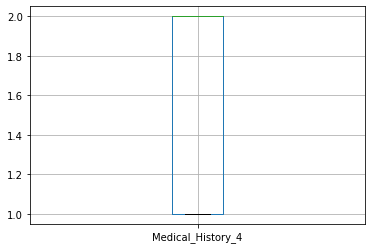

count    56018.000000
mean         1.654540
std          0.475522
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Medical_History_4, dtype: float64
Skewness:  -0.6500014835141162


Column:  Medical_History_5


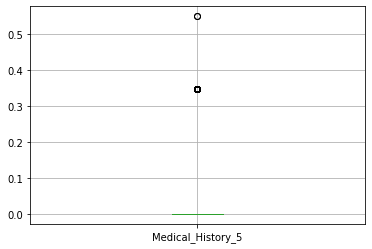

count    56018.000000
mean         0.002531
std          0.029579
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.549306
Name: Medical_History_5, dtype: float64
Skewness:  11.63010567075822


Column:  Medical_History_6


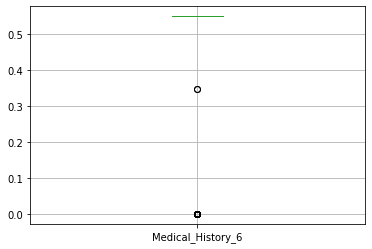

count    56018.000000
mean         0.518842
std          0.125714
min          0.000000
25%          0.549306
50%          0.549306
75%          0.549306
max          0.549306
Name: Medical_History_6, dtype: float64
Skewness:  -3.884759926220588


Column:  Medical_History_7


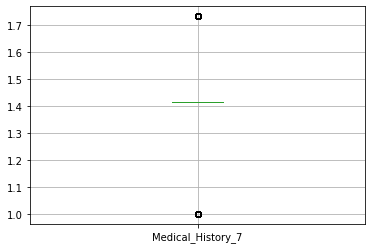

count    56018.000000
mean         1.417230
std          0.060423
min          1.000000
25%          1.414214
50%          1.414214
75%          1.414214
max          1.732051
Name: Medical_History_7, dtype: float64
Skewness:  0.05151171823921261


Column:  Medical_History_8


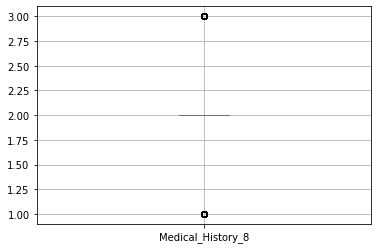

count    56018.000000
mean         2.043968
std          0.291219
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_8, dtype: float64
Skewness:  1.3239421383209051


Column:  Medical_History_9


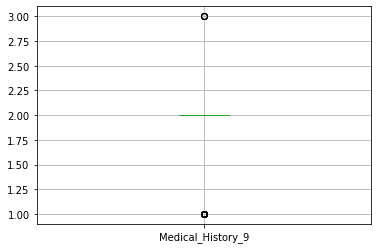

count    56018.000000
mean         1.770074
std          0.420959
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_9, dtype: float64
Skewness:  -1.2808289551836927


Column:  Medical_History_10


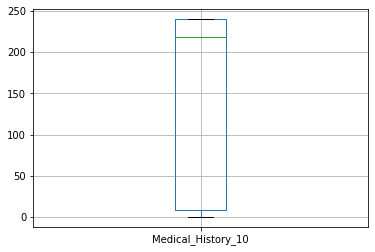

count    532.000000
mean     140.035714
std      107.850216
min        0.000000
25%        8.000000
50%      218.500000
75%      240.000000
max      240.000000
Name: Medical_History_10, dtype: float64
Skewness:  -0.2930888639646689


Column:  Medical_History_11


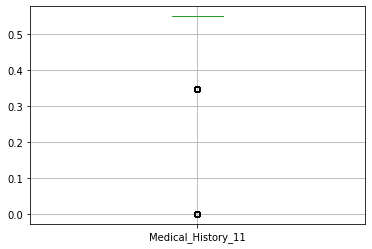

count    56018.000000
mean         0.547874
std          0.023669
min          0.000000
25%          0.549306
50%          0.549306
75%          0.549306
max          0.549306
Name: Medical_History_11, dtype: float64
Skewness:  -19.6792391361047


Column:  Medical_History_12


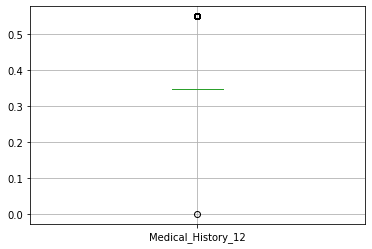

count    56018.000000
mean         0.358040
std          0.046867
min          0.000000
25%          0.346574
50%          0.346574
75%          0.346574
max          0.549306
Name: Medical_History_12, dtype: float64
Skewness:  3.8246831379691404


Column:  Medical_History_13


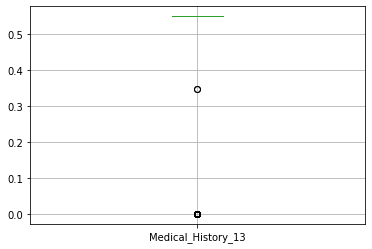

count    56018.000000
mean         0.485482
std          0.176021
min          0.000000
25%          0.549306
50%          0.549306
75%          0.549306
max          0.549306
Name: Medical_History_13, dtype: float64
Skewness:  -2.3955196947414805


Column:  Medical_History_14


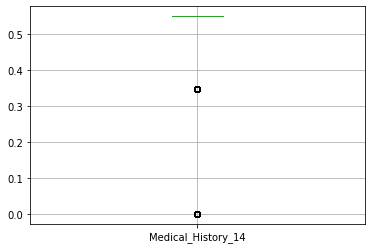

count    56018.000000
mean         0.542312
std          0.046814
min          0.000000
25%          0.549306
50%          0.549306
75%          0.549306
max          0.549306
Name: Medical_History_14, dtype: float64
Skewness:  -8.379375590089184


Column:  Medical_History_15


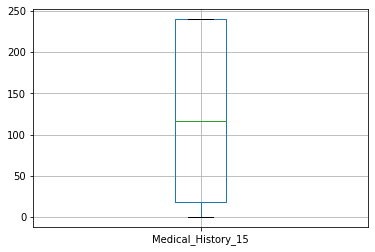

count    13961.000000
mean       123.847862
std         98.495888
min          0.000000
25%         18.000000
50%        117.000000
75%        240.000000
max        240.000000
Name: Medical_History_15, dtype: float64
Skewness:  0.01562884519025683


Column:  Medical_History_16


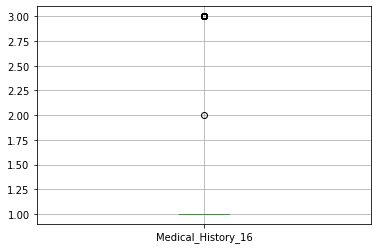

count    56018.000000
mean         1.326199
std          0.738907
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Medical_History_16, dtype: float64
Skewness:  1.8238133077428498


Column:  Medical_History_17


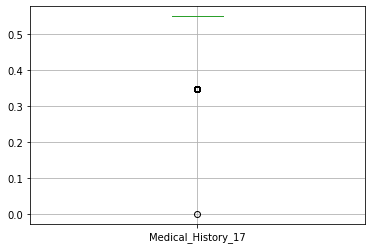

count    56018.000000
mean         0.544827
std          0.029857
min          0.000000
25%          0.549306
50%          0.549306
75%          0.549306
max          0.549306
Name: Medical_History_17, dtype: float64
Skewness:  -6.559796871767703


Column:  Medical_History_18


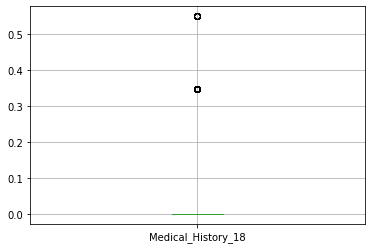

count    56018.000000
mean         0.018609
std          0.078250
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.549306
Name: Medical_History_18, dtype: float64
Skewness:  3.9755761259891966


Column:  Medical_History_19


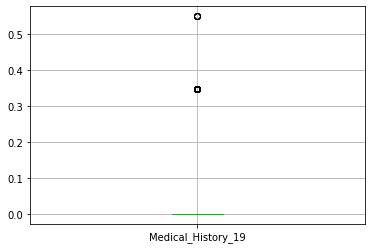

count    56018.000000
mean         0.012033
std          0.063526
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.549306
Name: Medical_History_19, dtype: float64
Skewness:  5.0978249491317555


Column:  Medical_History_20


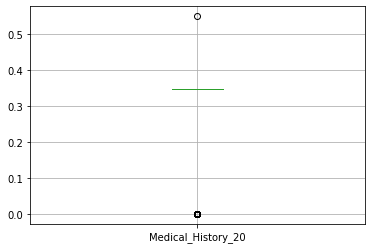

count    56018.000000
mean         0.341374
std          0.042154
min          0.000000
25%          0.346574
50%          0.346574
75%          0.346574
max          0.549306
Name: Medical_History_20, dtype: float64
Skewness:  -7.969603232387405


Column:  Medical_History_21


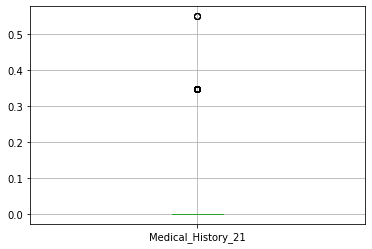

count    56018.000000
mean         0.037723
std          0.107977
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.549306
Name: Medical_History_21, dtype: float64
Skewness:  2.514299133070323


Column:  Medical_History_22


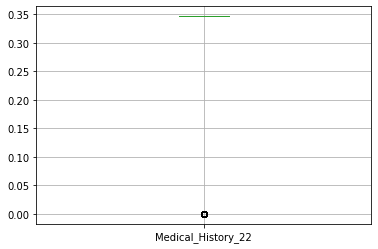

count    56018.000000
mean         0.340226
std          0.046472
min          0.000000
25%          0.346574
50%          0.346574
75%          0.346574
max          0.346574
Name: Medical_History_22, dtype: float64
Skewness:  -7.184696392317708


Column:  Medical_History_23


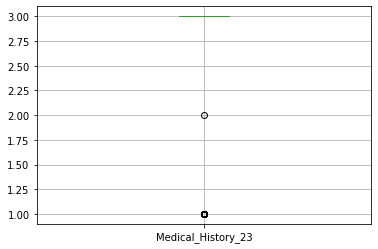

count    56018.000000
mean         2.526456
std          0.850200
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_23, dtype: float64
Skewness:  -1.2384575972220362


Column:  Medical_History_24


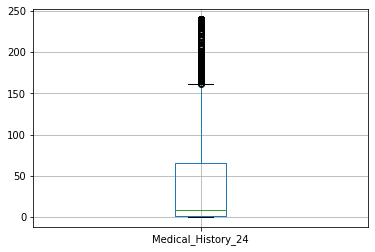

count    3582.000000
mean       50.852317
std        78.120309
min         0.000000
25%         1.000000
50%         8.000000
75%        65.000000
max       240.000000
Name: Medical_History_24, dtype: float64
Skewness:  1.5464944253689648


Column:  Medical_History_25


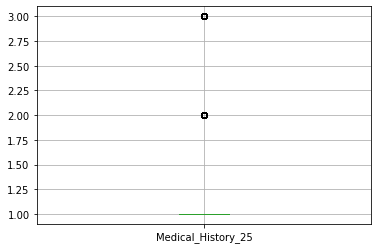

count    56018.000000
mean         1.194902
std          0.406098
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Medical_History_25, dtype: float64
Skewness:  1.7182068551088967


Column:  Medical_History_26


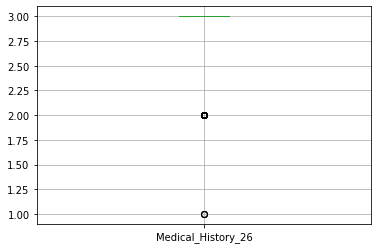

count    56018.000000
mean         2.809061
std          0.393181
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_26, dtype: float64
Skewness:  -1.5753533855955455


Column:  Medical_History_27


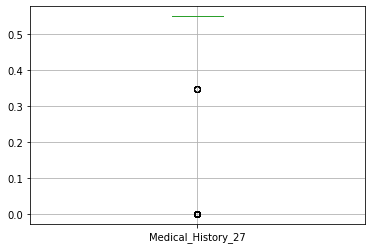

count    56018.000000
mean         0.543868
std          0.054304
min          0.000000
25%          0.549306
50%          0.549306
75%          0.549306
max          0.549306
Name: Medical_History_27, dtype: float64
Skewness:  -9.904637041130716


Column:  Medical_History_28


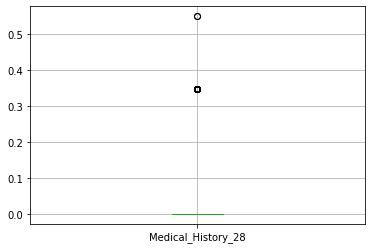

count    56018.000000
mean         0.023214
std          0.086664
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.549306
Name: Medical_History_28, dtype: float64
Skewness:  3.4666764320398653


Column:  Medical_History_29


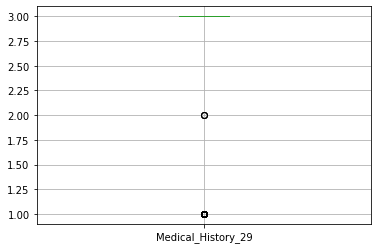

count    56018.000000
mean         2.542236
std          0.840202
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_29, dtype: float64
Skewness:  -1.2907264711342155


Column:  Medical_History_30


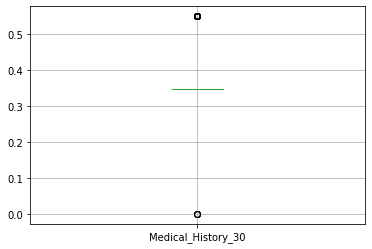

count    56018.000000
mean         0.354822
std          0.040222
min          0.000000
25%          0.346574
50%          0.346574
75%          0.346574
max          0.549306
Name: Medical_History_30, dtype: float64
Skewness:  4.556229936432716


Column:  Medical_History_31


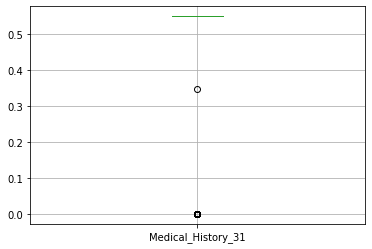

count    56018.000000
mean         0.545213
std          0.047225
min          0.000000
25%          0.549306
50%          0.549306
75%          0.549306
max          0.549306
Name: Medical_History_31, dtype: float64
Skewness:  -11.45648595550955


Column:  Medical_History_32


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


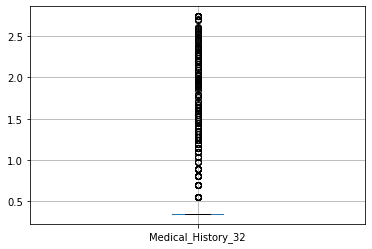

count    1052.000000
mean            -inf
std              NaN
min             -inf
25%              NaN
50%              NaN
75%         0.346574
max         2.740319
Name: Medical_History_32, dtype: float64
Skewness:  nan




/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Column:  Medical_History_33


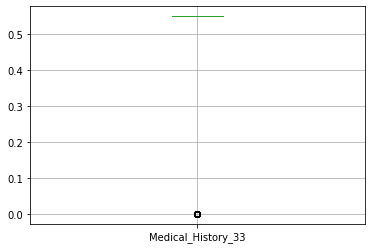

count    56018.000000
mean         0.495521
std          0.163255
min          0.000000
25%          0.549306
50%          0.549306
75%          0.549306
max          0.549306
Name: Medical_History_33, dtype: float64
Skewness:  -2.7058971601509394


Column:  Medical_History_34


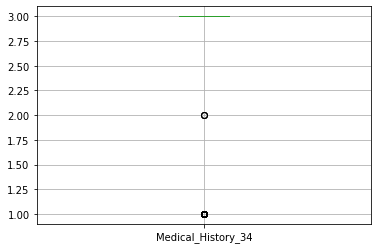

count    56018.000000
mean         2.689511
std          0.724245
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Medical_History_34, dtype: float64
Skewness:  -1.9040511817933221


Column:  Medical_History_35


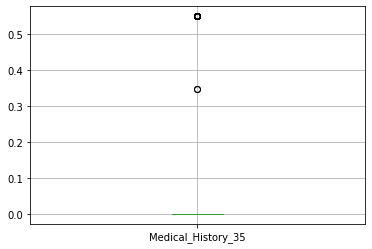

count    56018.000000
mean         0.000532
std          0.017014
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.549306
Name: Medical_History_35, dtype: float64
Skewness:  32.04704859310889


Column:  Medical_History_36


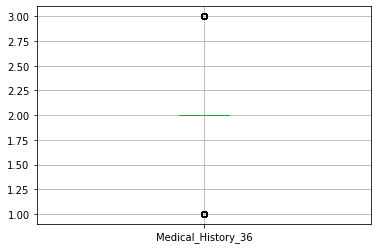

count    56018.000000
mean         2.179532
std          0.412323
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Medical_History_36, dtype: float64
Skewness:  1.1724067697658835


Column:  Medical_History_37


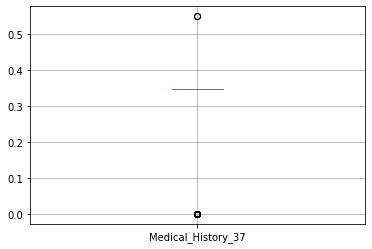

count    56018.000000
mean         0.325249
std          0.083307
min          0.000000
25%          0.346574
50%          0.346574
75%          0.346574
max          0.549306
Name: Medical_History_37, dtype: float64
Skewness:  -3.646839828947099


Column:  Medical_History_38


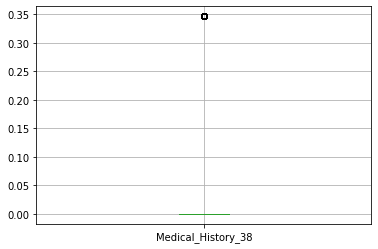

count    56018.000000
mean         0.001683
std          0.024091
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.346574
Name: Medical_History_38, dtype: float64
Skewness:  14.246553204669164


Column:  Medical_History_39


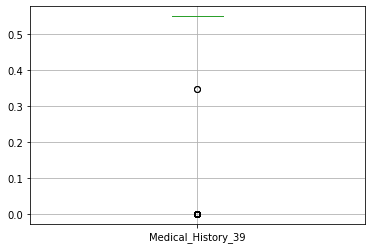

count    56018.000000
mean         0.502741
std          0.152998
min          0.000000
25%          0.549306
50%          0.549306
75%          0.549306
max          0.549306
Name: Medical_History_39, dtype: float64
Skewness:  -2.9815762306912967


Column:  Medical_History_40


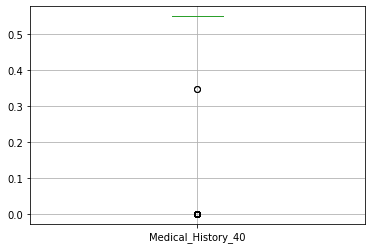

count    56018.000000
mean         0.540513
std          0.068924
min          0.000000
25%          0.549306
50%          0.549306
75%          0.549306
max          0.549306
Name: Medical_History_40, dtype: float64
Skewness:  -7.713401910498649


Column:  Medical_History_41


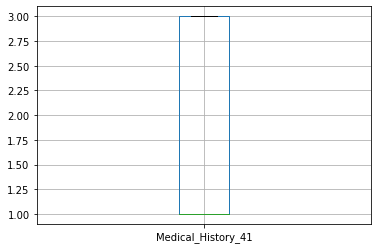

count    56018.000000
mean         1.639741
std          0.932851
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: Medical_History_41, dtype: float64
Skewness:  0.7724028153722625


Column:  Medical_Keyword_1


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


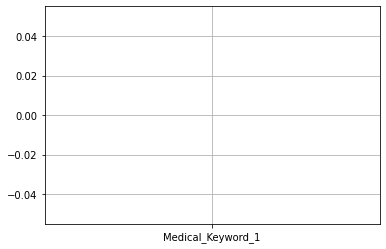

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_1, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_2


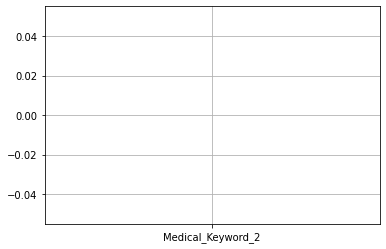

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_2, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_3


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


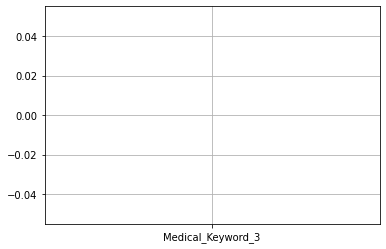

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_3, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_4


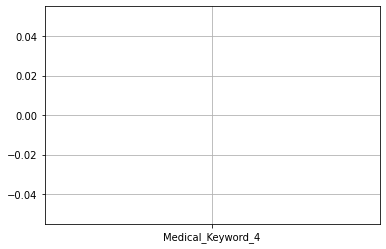

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_4, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_5


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


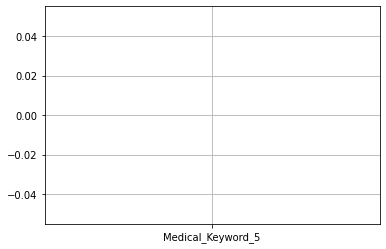

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_5, dtype: float64
Skewness:  nan




/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Column:  Medical_Keyword_6


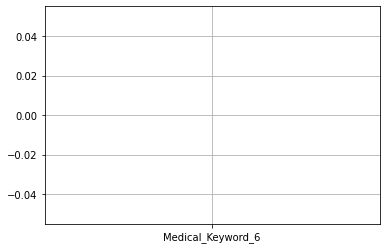

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_6, dtype: float64
Skewness:  nan




/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Column:  Medical_Keyword_7


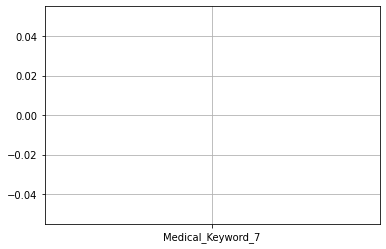

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_7, dtype: float64
Skewness:  nan




/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Column:  Medical_Keyword_8


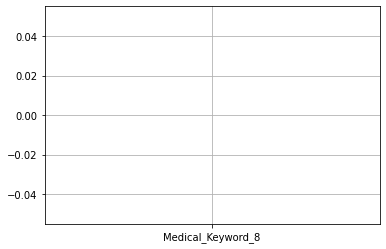

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_8, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_9


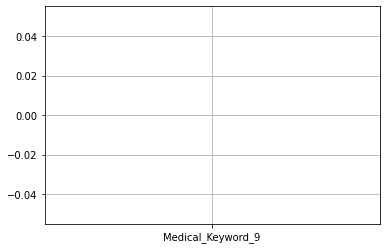

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_9, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_10


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


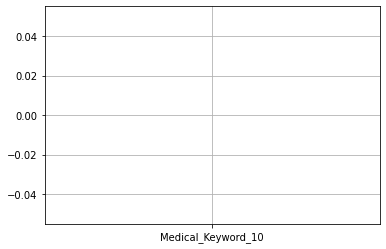

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_10, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_11


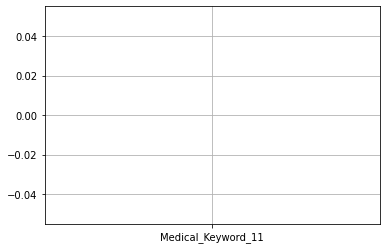

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_11, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_12


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


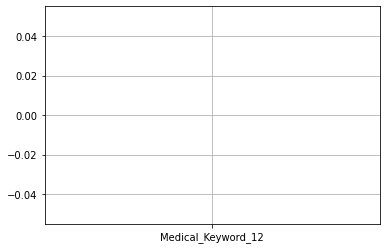

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_12, dtype: float64
Skewness:  nan




/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Column:  Medical_Keyword_13


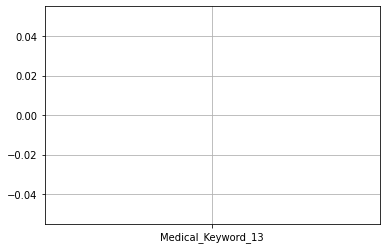

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_13, dtype: float64
Skewness: 

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


 nan


Column:  Medical_Keyword_14


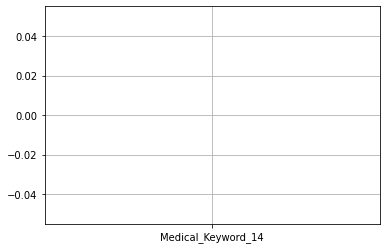

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_14, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_15


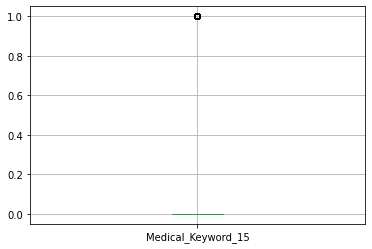

count    56018.000000
mean         0.191099
std          0.393171
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Medical_Keyword_15, dtype: float64
Skewness:  1.5713878383176956


Column:  Medical_Keyword_16


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


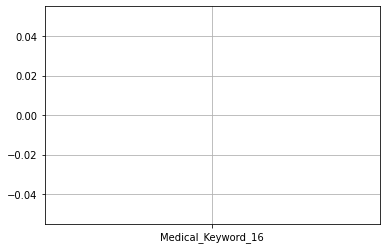

count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_16, dtype: float64
Skewness:  nan




/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Column:  Medical_Keyword_17


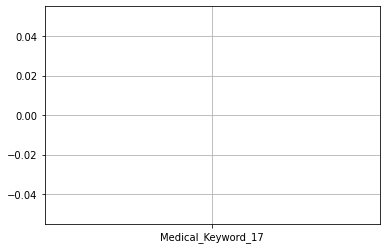

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_17, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_18


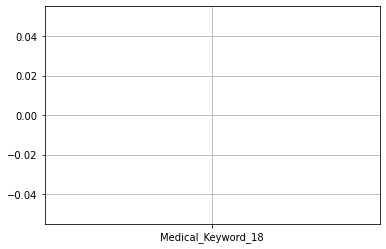

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_18, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_19


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


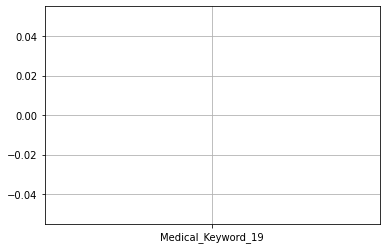

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_19, dtype: float64
Skewness:  nan




/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Column:  Medical_Keyword_20


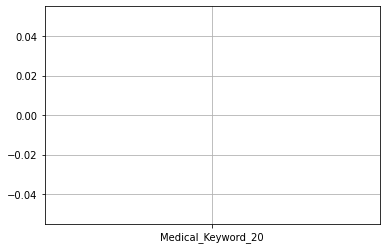

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_20, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_21


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


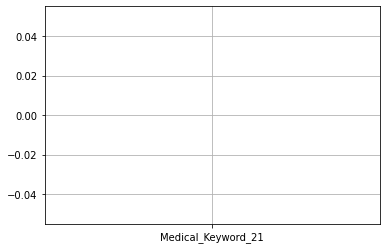

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_21, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_22


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


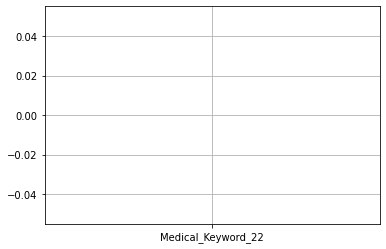

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_22, dtype: float64
Skewness:  nan




/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Column:  Medical_Keyword_23


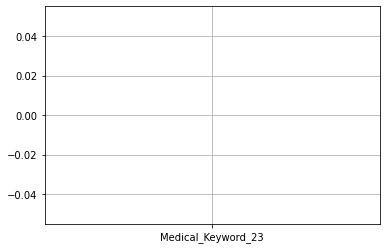

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_23, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_24


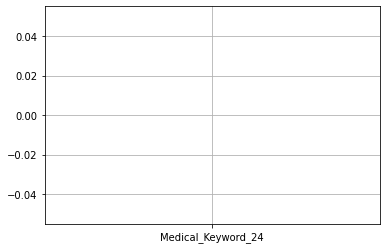

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_24, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_25


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


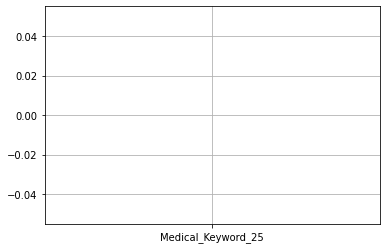

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_25, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_26


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


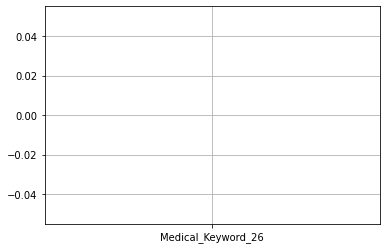

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_26, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_27


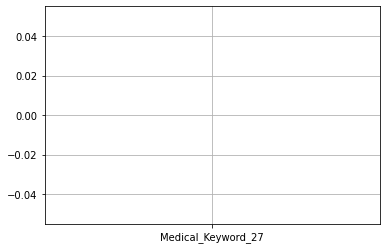

count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_27, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_28


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


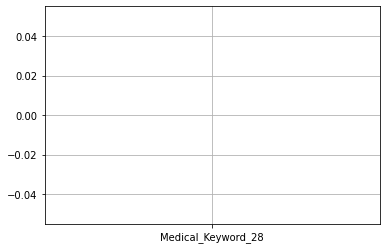

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_28, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_29


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


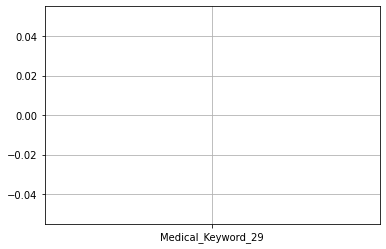

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_29, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_30


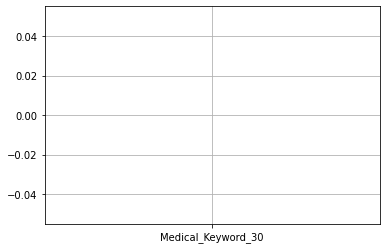

count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_30, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_31


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


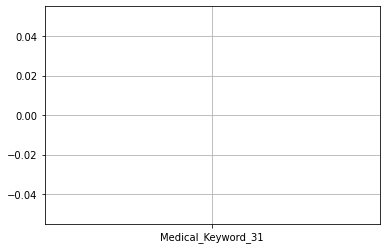

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_31, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_32


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


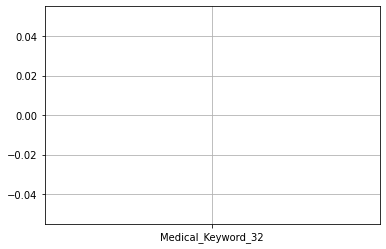

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_32, dtype: float64
Skewness:  nan




/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Column:  Medical_Keyword_33


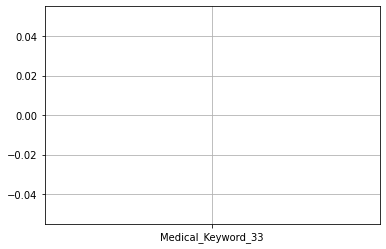

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_33, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_34


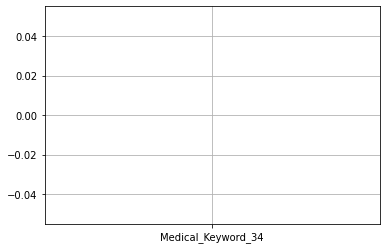

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_34, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_35


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


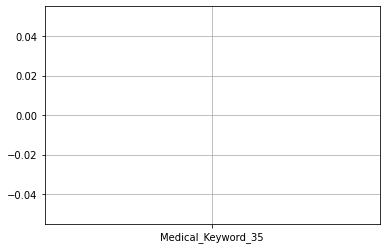

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_35, dtype: float64
Skewness:  nan




/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Column:  Medical_Keyword_36


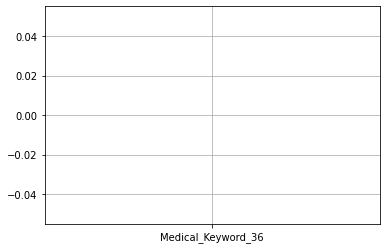

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_36, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_37


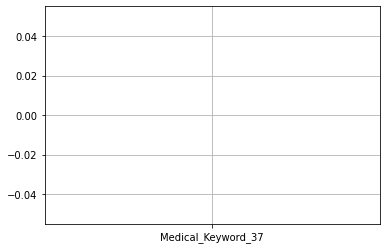

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_37, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_38


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


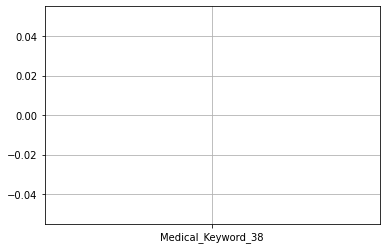

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_38, dtype: float64
Skewness:  nan




/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Column:  Medical_Keyword_39


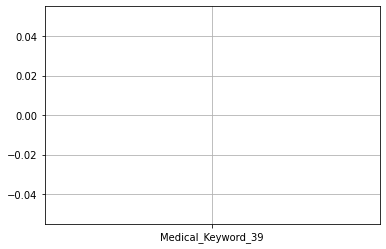

count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_39, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)



Skewness:  nan




/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Column:  Medical_Keyword_40


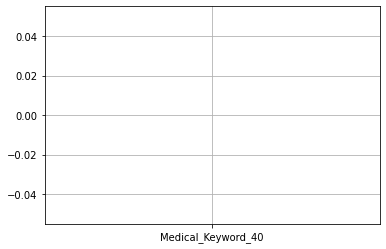

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_40, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_41


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


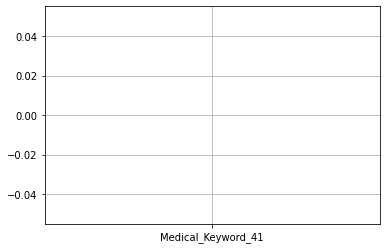

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_41, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_42


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


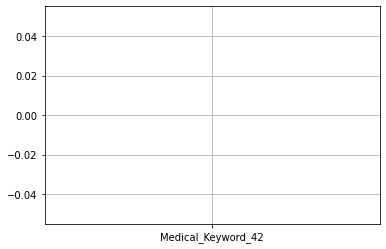

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_42, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_43


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


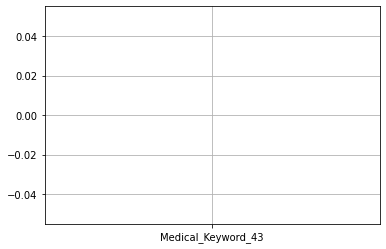

count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_43, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)



Skewness:  nan


Column:  Medical_Keyword_44


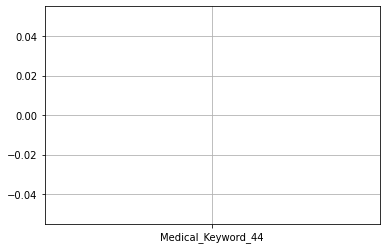

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_44, dtype: float64
Skewness:  nan




/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Column:  Medical_Keyword_45


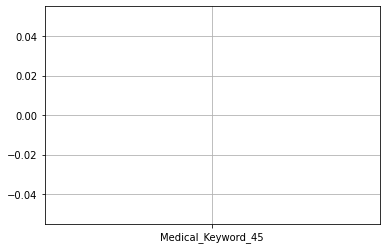

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_45, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_46


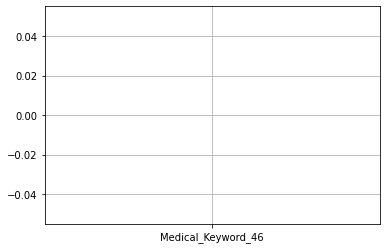

count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_46, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_47


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


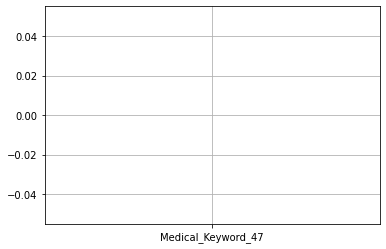

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_47, dtype: float64
Skewness:  nan


Column:  Medical_Keyword_48


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


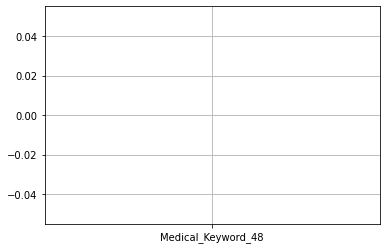

count    56018.0
mean        -inf
std          NaN
min         -inf
25%          NaN
50%          NaN
75%          NaN
max          0.0
Name: Medical_Keyword_48, dtype: float64
Skewness:  nan




/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [37]:
for column in columns:
    dataset.boxplot(column=column)
    print('Column: ', column)
    plt.show()
    print(dataset[column].describe())
    print('Skewness: ', dataset[column].skew())
    print('\n')

-------------------------------------------
Column:  Product_Info_6


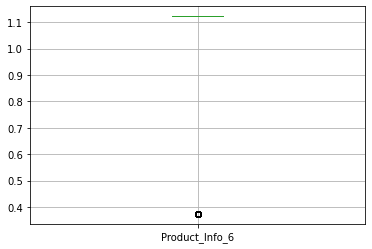

count    56018.000000
mean         1.000000
std          0.276601
min          0.374077
25%          1.122230
50%          1.122230
75%          1.122230
max          1.122230
Name: Product_Info_6, dtype: float64
Skewness:  -1.8210726684138985


Column:  Employment_Info_2


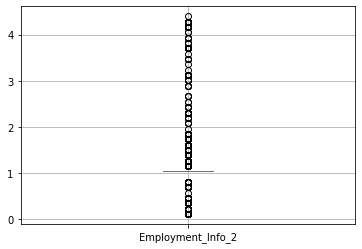

count    56018.000000
mean         1.000000
std          0.488458
min          0.115666
25%          1.040990
50%          1.040990
75%          1.040990
max          4.395292
Name: Employment_Info_2, dtype: float64
Skewness:  0.5531523733700418


Column:  InsuredInfo_3


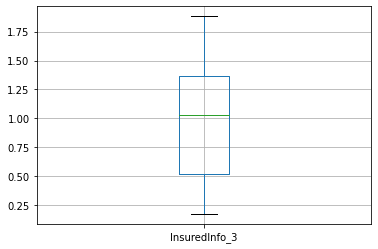

count    56018.000000
mean         1.000000
std          0.457561
min          0.171205
25%          0.513614
50%          1.027228
75%          1.369637
max          1.883251
Name: InsuredInfo_3, dtype: float64
Skewness:  0.10575000237291188


Column:  Insurance_History_3


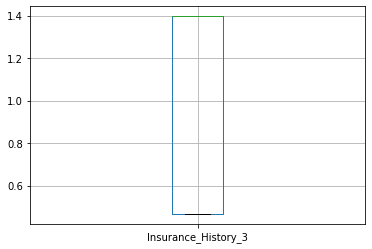

count    56018.000000
mean         1.000000
std          0.460644
min          0.465718
25%          0.465718
50%          1.397155
75%          1.397155
max          1.397155
Name: Insurance_History_3, dtype: float64
Skewness:  -0.2976927084395886


Column:  Insurance_History_8


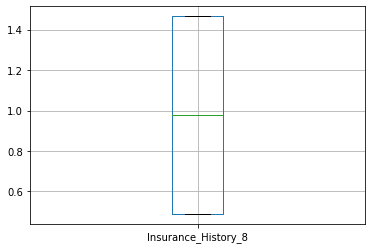

count    56018.000000
mean         1.000000
std          0.368951
min          0.488464
25%          0.488464
50%          0.976928
75%          1.465391
max          1.465391
Name: Insurance_History_8, dtype: float64
Skewness:  -0.07824095777026652


Column:  Insurance_History_9


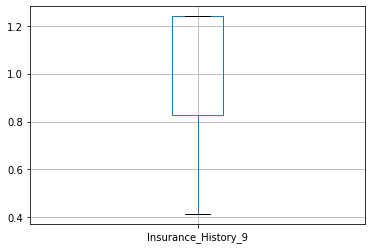

count    56018.000000
mean         1.000000
std          0.210601
min          0.413356
25%          0.826712
50%          0.826712
75%          1.240068
max          1.240068
Name: Insurance_History_9, dtype: float64
Skewness:  0.14430316848155797


Column:  Family_Hist_1


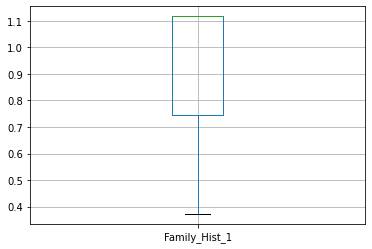

count    56018.000000
mean         1.000000
std          0.179760
min          0.372223
25%          0.744445
50%          1.116668
75%          1.116668
max          1.116668
Name: Family_Hist_1, dtype: float64
Skewness:  -1.0426469550391384


Column:  Medical_History_1


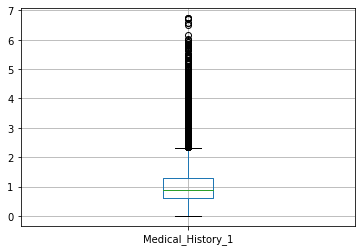

count    47641.000000
mean         1.000000
std          0.707680
min          0.000000
25%          0.614240
50%          0.868667
75%          1.303000
max          6.728664
Name: Medical_History_1, dtype: float64
Skewness:  1.5662244737248714


Column:  Medical_History_2


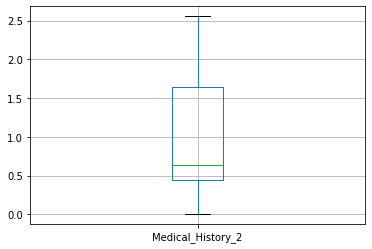

count    56018.000000
mean         1.000000
std          0.703867
min          0.003943
25%          0.441652
50%          0.638818
75%          1.640423
max          2.555274
Name: Medical_History_2, dtype: float64
Skewness:  0.5973544988810048


Column:  Medical_History_8


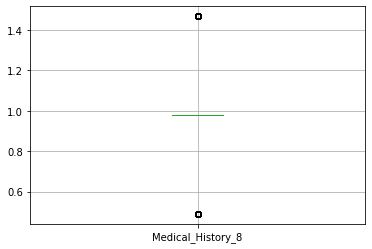

count    56018.000000
mean         1.000000
std          0.142477
min          0.489244
25%          0.978489
50%          0.978489
75%          0.978489
max          1.467733
Name: Medical_History_8, dtype: float64
Skewness:  1.3239421383209096


Column:  Medical_History_10


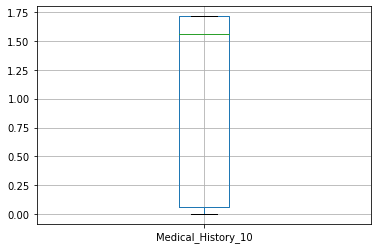

count    532.000000
mean       1.000000
std        0.770162
min        0.000000
25%        0.057128
50%        1.560316
75%        1.713849
max        1.713849
Name: Medical_History_10, dtype: float64
Skewness:  -0.2930888639646699


Column:  Medical_History_15


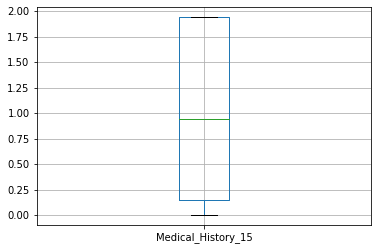

count    13961.000000
mean         1.000000
std          0.795297
min          0.000000
25%          0.145340
50%          0.944707
75%          1.937861
max          1.937861
Name: Medical_History_15, dtype: float64
Skewness:  0.015628845190256875


Column:  Medical_History_23


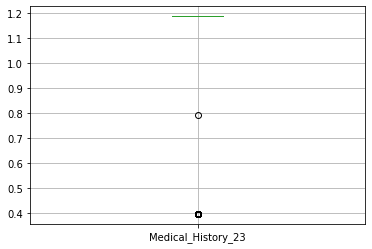

count    56018.000000
mean         1.000000
std          0.336519
min          0.395811
25%          1.187434
50%          1.187434
75%          1.187434
max          1.187434
Name: Medical_History_23, dtype: float64
Skewness:  -1.2384575972220346


Column:  Medical_History_24


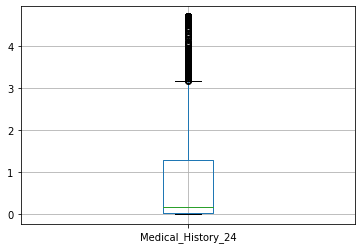

count    3582.000000
mean        1.000000
std         1.536219
min         0.000000
25%         0.019665
50%         0.157318
75%         1.278211
max         4.719549
Name: Medical_History_24, dtype: float64
Skewness:  1.546494425368965


Column:  Medical_History_26


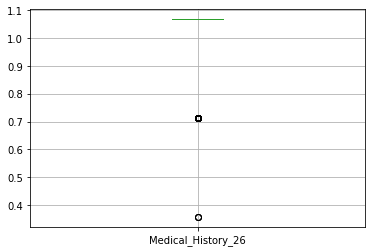

count    56018.000000
mean         1.000000
std          0.139969
min          0.355991
25%          1.067972
50%          1.067972
75%          1.067972
max          1.067972
Name: Medical_History_26, dtype: float64
Skewness:  -1.5753533855955513


Column:  Medical_History_29


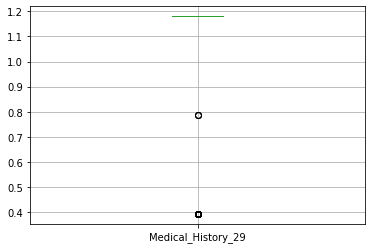

count    56018.000000
mean         1.000000
std          0.330497
min          0.393354
25%          1.180063
50%          1.180063
75%          1.180063
max          1.180063
Name: Medical_History_29, dtype: float64
Skewness:  -1.290726471134212


Column:  Medical_History_34


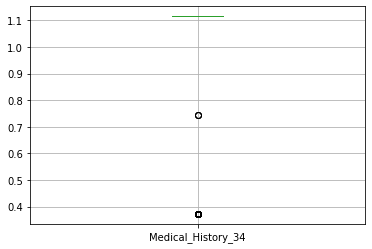

count    56018.000000
mean         1.000000
std          0.269285
min          0.371815
25%          1.115445
50%          1.115445
75%          1.115445
max          1.115445
Name: Medical_History_34, dtype: float64
Skewness:  -1.9040511817933192


Column:  Medical_History_36


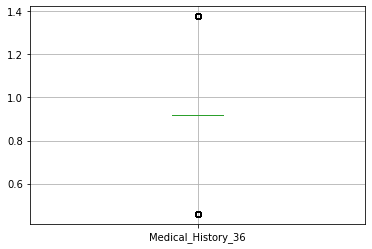

count    56018.000000
mean         1.000000
std          0.189180
min          0.458814
25%          0.917628
50%          0.917628
75%          0.917628
max          1.376443
Name: Medical_History_36, dtype: float64
Skewness:  1.1724067697658802




In [38]:
print("-------------------------------------------")
for column in columns:
    if dataset[column].mean() > 2:
        dataset[column] = dataset[column]/dataset[column].mean()
        dataset.boxplot(column=column)
        print('Column: ', column)
        plt.show()
        print(dataset[column].describe())
        print('Skewness: ', dataset[column].skew())
        print('\n')

# mean transformation to reduce variance

-------------------------------------------
Column:  Product_Info_1


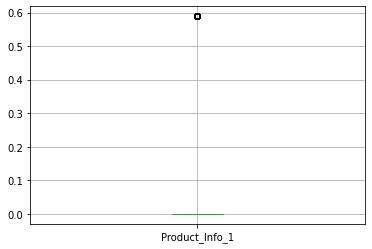

count    56019.000000
mean         0.015553
std          0.094417
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.588705
Name: Product_Info_1, dtype: float64
Skewness:  5.905902143583628


Column:  Product_Info_3


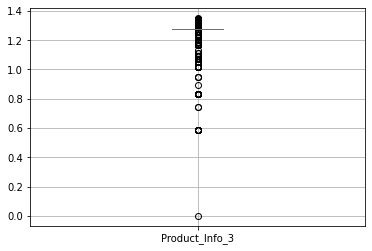

count    56019.000000
mean         1.255288
std          0.064896
min          0.000000
25%          1.276342
50%          1.276342
75%          1.276342
max          1.348626
Name: Product_Info_3, dtype: float64
Skewness:  -2.8373346242560635


Column:  Product_Info_5


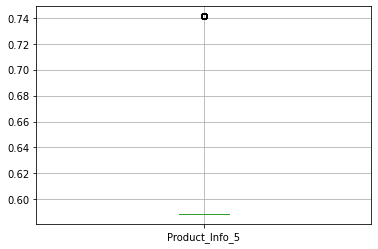

count    56018.000000
mean         0.589769
std          0.012692
min          0.588705
25%          0.588705
50%          0.588705
75%          0.588705
max          0.741152
Name: Product_Info_5, dtype: float64
Skewness:  11.84411600187766


Column:  Product_Info_7


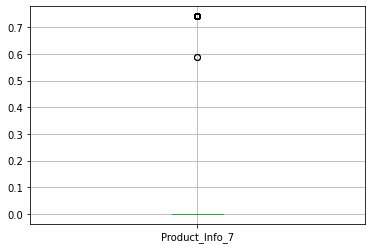

count    56018.000000
mean         0.016083
std          0.107973
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.741152
Name: Product_Info_7, dtype: float64
Skewness:  6.565075829166244


Column:  Employment_Info_5


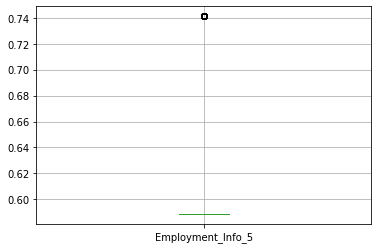

count    56018.000000
mean         0.610427
std          0.053289
min          0.588705
25%          0.588705
50%          0.588705
75%          0.588705
max          0.741152
Name: Employment_Info_5, dtype: float64
Skewness:  2.0455883567662694


Column:  InsuredInfo_2


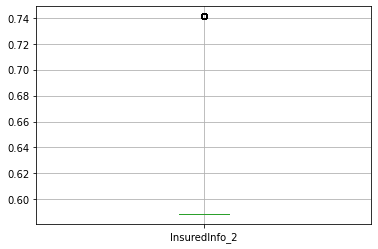

count    56018.000000
mean         0.589818
std          0.012979
min          0.588705
25%          0.588705
50%          0.588705
75%          0.588705
max          0.741152
Name: InsuredInfo_2, dtype: float64
Skewness:  11.574880351176995


Column:  InsuredInfo_4


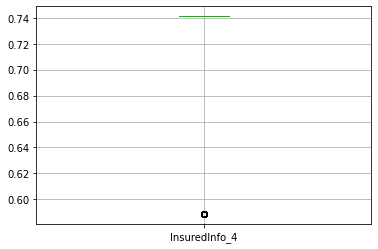

count    56018.000000
mean         0.723408
std          0.048889
min          0.588705
25%          0.741152
50%          0.741152
75%          0.741152
max          0.741152
Name: InsuredInfo_4, dtype: float64
Skewness:  -2.392435331245348


Column:  InsuredInfo_5


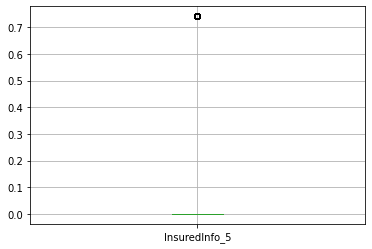

count    56018.000000
mean         0.010254
std          0.086571
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.741152
Name: InsuredInfo_5, dtype: float64
Skewness:  8.324603923454642


Column:  InsuredInfo_7


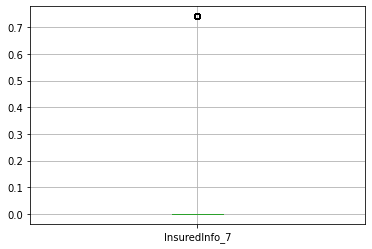

count    56018.000000
mean         0.014302
std          0.101960
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.741152
Name: InsuredInfo_7, dtype: float64
Skewness:  6.988764508030467


Column:  Insurance_History_2


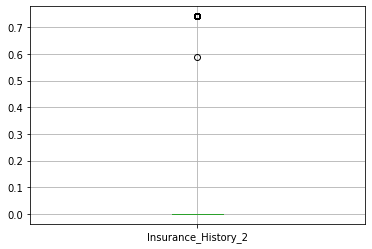

count    56018.000000
mean         0.020796
std          0.122389
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.741152
Name: Insurance_History_2, dtype: float64
Skewness:  5.715589401695753


Column:  Medical_History_3


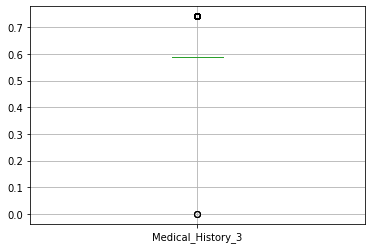

count    56018.000000
mean         0.604316
std          0.046471
min          0.000000
25%          0.588705
50%          0.588705
75%          0.588705
max          0.741152
Name: Medical_History_3, dtype: float64
Skewness:  2.46799079265577


Column:  Medical_History_5


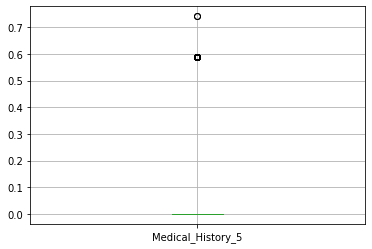

count    56018.000000
mean         0.004293
std          0.050131
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.741152
Name: Medical_History_5, dtype: float64
Skewness:  11.59615625486178


Column:  Medical_History_6


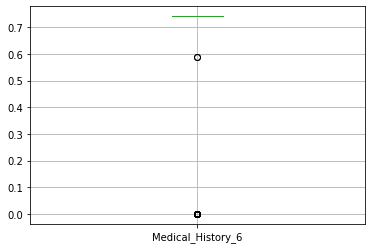

count    56018.000000
mean         0.700052
std          0.169615
min          0.000000
25%          0.741152
50%          0.741152
75%          0.741152
max          0.741152
Name: Medical_History_6, dtype: float64
Skewness:  -3.8850556596846193


Column:  Medical_History_11


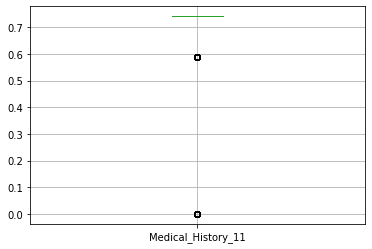

count    56018.000000
mean         0.739606
std          0.029264
min          0.000000
25%          0.741152
50%          0.741152
75%          0.741152
max          0.741152
Name: Medical_History_11, dtype: float64
Skewness:  -23.495084931639706


Column:  Medical_History_12


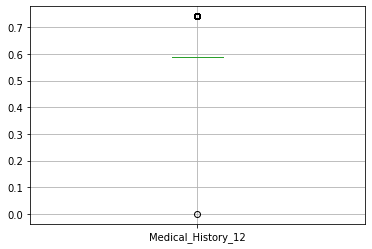

count    56018.000000
mean         0.597321
std          0.035314
min          0.000000
25%          0.588705
50%          0.588705
75%          0.588705
max          0.741152
Name: Medical_History_12, dtype: float64
Skewness:  3.7233732053239645


Column:  Medical_History_13


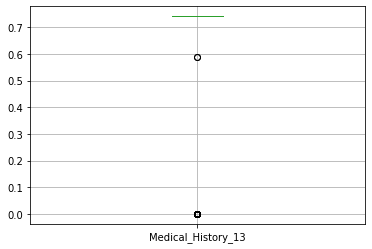

count    56018.000000
mean         0.655042
std          0.237494
min          0.000000
25%          0.741152
50%          0.741152
75%          0.741152
max          0.741152
Name: Medical_History_13, dtype: float64
Skewness:  -2.395627429401883


Column:  Medical_History_14


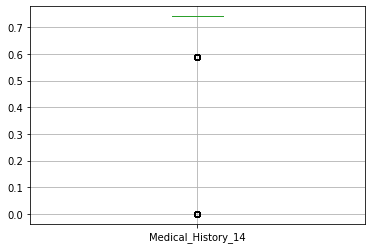

count    56018.000000
mean         0.734475
std          0.053463
min          0.000000
25%          0.741152
50%          0.741152
75%          0.741152
max          0.741152
Name: Medical_History_14, dtype: float64
Skewness:  -11.661928144674613


Column:  Medical_History_17


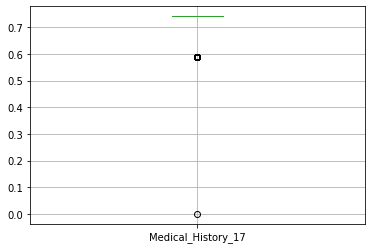

count    56018.000000
mean         0.737778
std          0.022601
min          0.000000
25%          0.741152
50%          0.741152
75%          0.741152
max          0.741152
Name: Medical_History_17, dtype: float64
Skewness:  -6.944677336721788


Column:  Medical_History_18


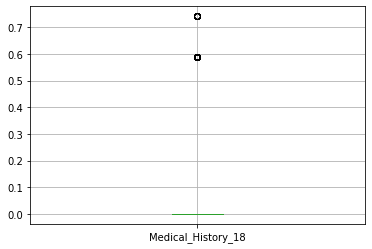

count    56018.000000
mean         0.031576
std          0.132711
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.741152
Name: Medical_History_18, dtype: float64
Skewness:  3.9663859437828792


Column:  Medical_History_19


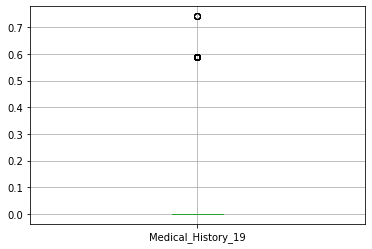

count    56018.000000
mean         0.020422
std          0.107778
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.741152
Name: Medical_History_19, dtype: float64
Skewness:  5.089226959880439


Column:  Medical_History_20


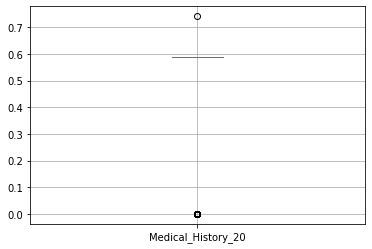

count    56018.000000
mean         0.579869
std          0.071593
min          0.000000
25%          0.588705
50%          0.588705
75%          0.588705
max          0.741152
Name: Medical_History_20, dtype: float64
Skewness:  -7.975510770865947


Column:  Medical_History_21


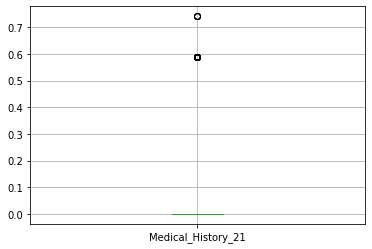

count    56018.000000
mean         0.064065
std          0.183356
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.741152
Name: Medical_History_21, dtype: float64
Skewness:  2.512894397976193


Column:  Medical_History_22


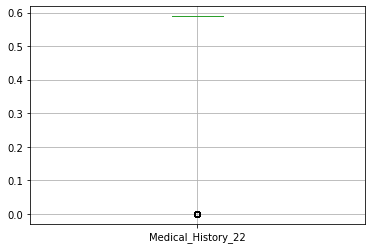

count    56018.000000
mean         0.577923
std          0.078940
min          0.000000
25%          0.588705
50%          0.588705
75%          0.588705
max          0.588705
Name: Medical_History_22, dtype: float64
Skewness:  -7.184696392317714


Column:  Medical_History_27


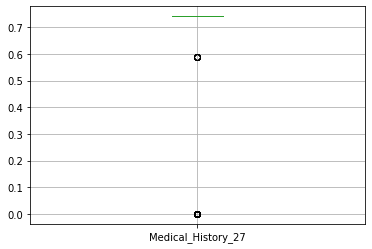

count    56018.000000
mean         0.733830
std          0.073227
min          0.000000
25%          0.741152
50%          0.741152
75%          0.741152
max          0.741152
Name: Medical_History_27, dtype: float64
Skewness:  -9.917475711566288


Column:  Medical_History_28


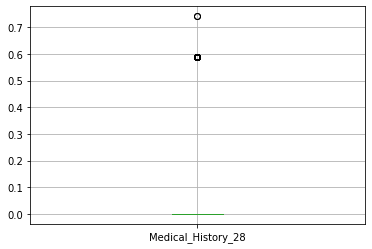

count    56018.000000
mean         0.039425
std          0.147173
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.741152
Name: Medical_History_28, dtype: float64
Skewness:  3.465317727888252


Column:  Medical_History_30


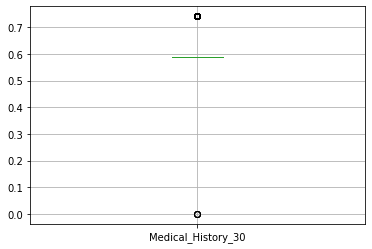

count    56018.000000
mean         0.594884
std          0.030577
min          0.000000
25%          0.588705
50%          0.588705
75%          0.588705
max          0.741152
Name: Medical_History_30, dtype: float64
Skewness:  3.93329831052634


Column:  Medical_History_31


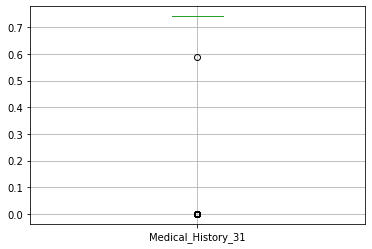

count    56018.000000
mean         0.735632
std          0.063711
min          0.000000
25%          0.741152
50%          0.741152
75%          0.741152
max          0.741152
Name: Medical_History_31, dtype: float64
Skewness:  -11.459275332925827


Column:  Medical_History_33


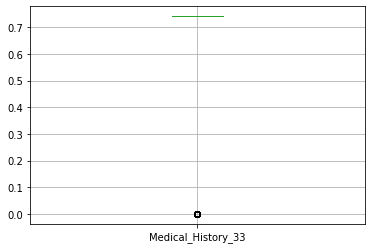

count    56018.000000
mean         0.668582
std          0.220272
min          0.000000
25%          0.741152
50%          0.741152
75%          0.741152
max          0.741152
Name: Medical_History_33, dtype: float64
Skewness:  -2.7058971601509416


Column:  Medical_History_35


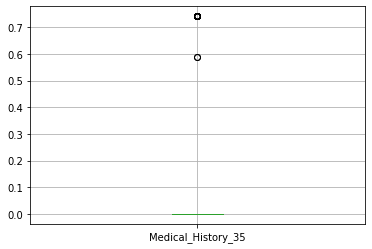

count    56018.000000
mean         0.000722
std          0.023056
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.741152
Name: Medical_History_35, dtype: float64
Skewness:  31.930661868163114


Column:  Medical_History_37


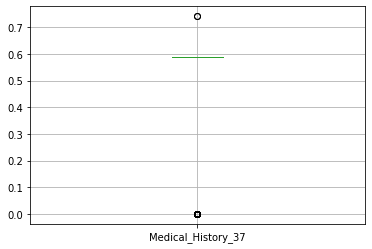

count    56018.000000
mean         0.552475
std          0.141495
min          0.000000
25%          0.588705
50%          0.588705
75%          0.588705
max          0.741152
Name: Medical_History_37, dtype: float64
Skewness:  -3.648370619626093


Column:  Medical_History_38


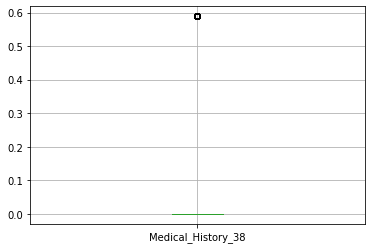

count    56018.000000
mean         0.002859
std          0.040923
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.588705
Name: Medical_History_38, dtype: float64
Skewness:  14.24655320466915


Column:  Medical_History_39


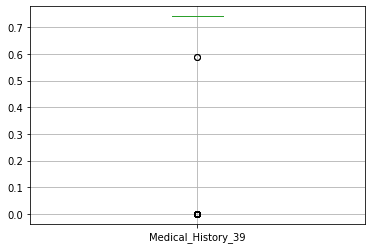

count    56018.000000
mean         0.678328
std          0.206429
min          0.000000
25%          0.741152
50%          0.741152
75%          0.741152
max          0.741152
Name: Medical_History_39, dtype: float64
Skewness:  -2.981740287457698


Column:  Medical_History_40


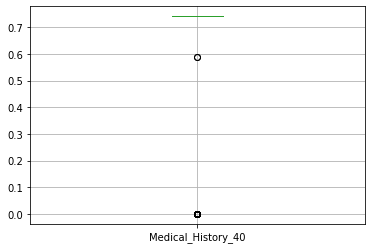

count    56018.000000
mean         0.729292
std          0.092986
min          0.000000
25%          0.741152
50%          0.741152
75%          0.741152
max          0.741152
Name: Medical_History_40, dtype: float64
Skewness:  -7.7151963692288295




In [39]:
print("-------------------------------------------")
for column in columns:
    if dataset[column].skew() > 2 or dataset[column].skew() < -2:
        dataset[column] = np.sqrt(dataset[column])
        dataset.boxplot(column=column)
        print('Column: ', column)
        plt.show()
        print(dataset[column].describe())
        print('Skewness: ', dataset[column].skew())
        print('\n')

In [40]:
categorical_columns = ["Product_Info_1", "Product_Info_3", "Product_Info_5", "Product_Info_6",\
                       "Product_Info_7", "Employment_Info_2", "Employment_Info_3", "Employment_Info_5", "InsuredInfo_1",\
                       "InsuredInfo_2", "InsuredInfo_3", "InsuredInfo_4", "InsuredInfo_5", "InsuredInfo_6", "InsuredInfo_7",\
                       "Insurance_History_1", "Insurance_History_2", "Insurance_History_3", "Insurance_History_4", "Insurance_History_7",\
                       "Insurance_History_8", "Insurance_History_9", "Family_Hist_1", "Medical_History_2", "Medical_History_3",\
                       "Medical_History_4", "Medical_History_5", "Medical_History_6", "Medical_History_7", "Medical_History_8",\
                       "Medical_History_9", "Medical_History_11", "Medical_History_12", "Medical_History_13", "Medical_History_14",\
                       "Medical_History_16", "Medical_History_17", "Medical_History_18", "Medical_History_19", "Medical_History_20",\
                       "Medical_History_21", "Medical_History_22", "Medical_History_23", "Medical_History_25", "Medical_History_26",\
                       "Medical_History_27", "Medical_History_28", "Medical_History_29", "Medical_History_30", "Medical_History_31",\
                       "Medical_History_33", "Medical_History_34", "Medical_History_35", "Medical_History_36", "Medical_History_37",\
                       "Medical_History_38", "Medical_History_39", "Medical_History_40", "Medical_History_41"]
continuous_columns = ["Product_Info_4", "Ins_Age", "Ht", "Wt", "BMI",
                      "Employment_Info_1", "Employment_Info_4", "Employment_Info_6",
                      "Insurance_History_5", "Family_Hist_2", "Family_Hist_3", "Family_Hist_4", "Family_Hist_5"]
DISCRETE_COLUMNS = ["Medical_History_1", "Medical_History_10", "Medical_History_15", "Medical_History_24", "Medical_History_32"]
DUMMY_COLUMNS = ["Medical_Keyword_{}".format(i) for i in range(1, 48)]

categorical_data = pd.concat([dataset[categorical_columns], testset[categorical_columns]])
continuous_data = pd.concat([dataset[continuous_columns], testset[continuous_columns]])
discrete_data = pd.concat([dataset[DISCRETE_COLUMNS], testset[DISCRETE_COLUMNS]])
dummy_data = pd.concat([dataset[DUMMY_COLUMNS], testset[DUMMY_COLUMNS]])

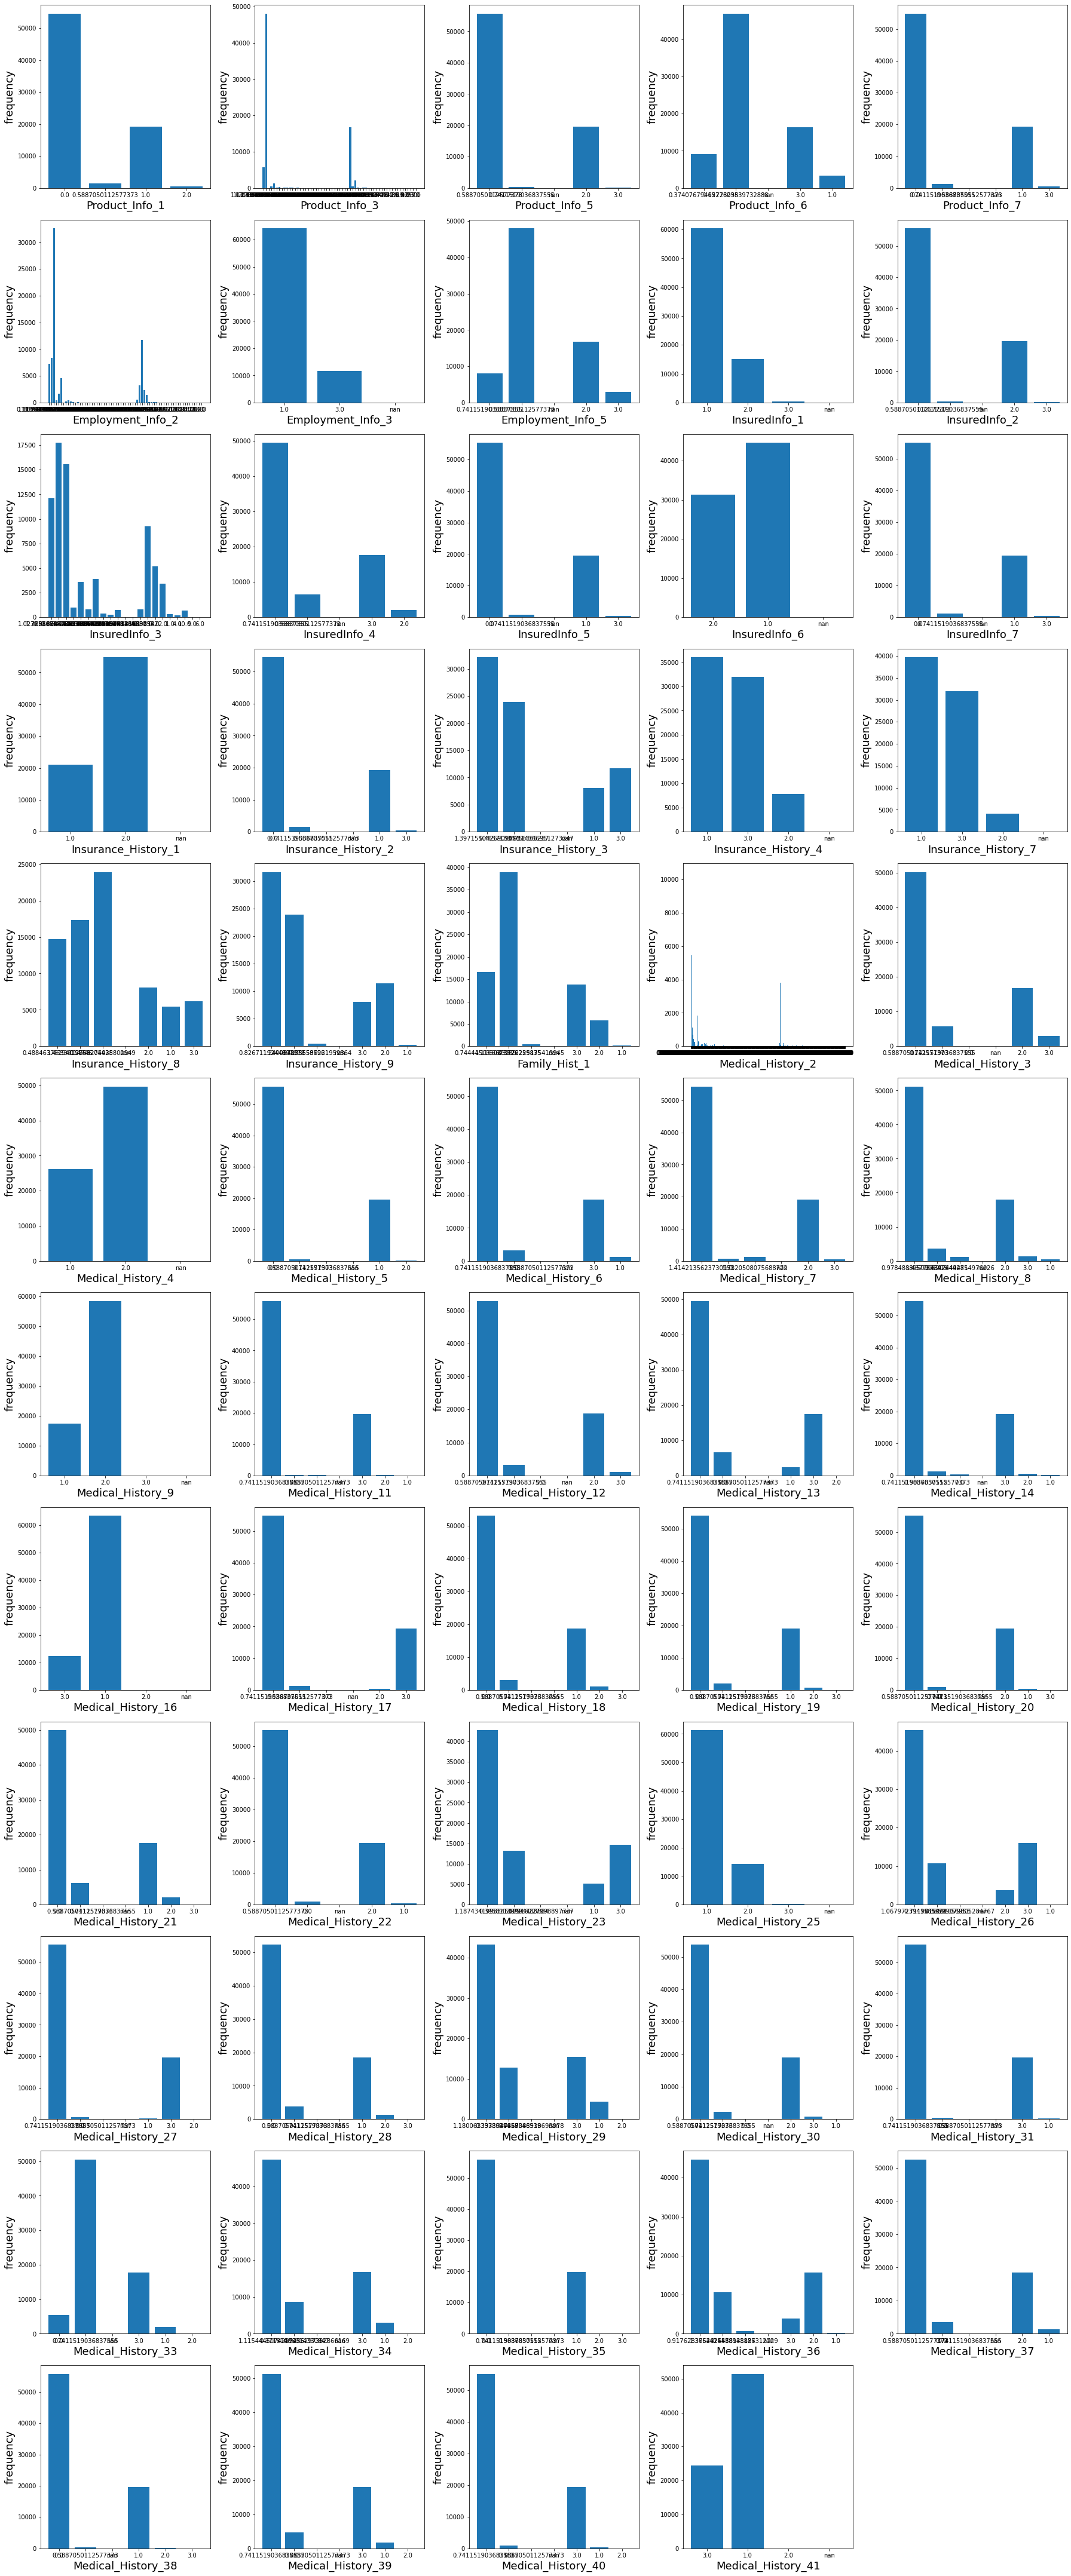

In [41]:
# display categorical data

def plot_categoricals(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        cnt = Counter(data[col])
        keys = list(cnt.keys())
        vals = list(cnt.values())
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.bar(range(len(keys)), vals, align="center")
        plt.xticks(range(len(keys)), keys)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_categoricals(categorical_data)

ValueError: ignored

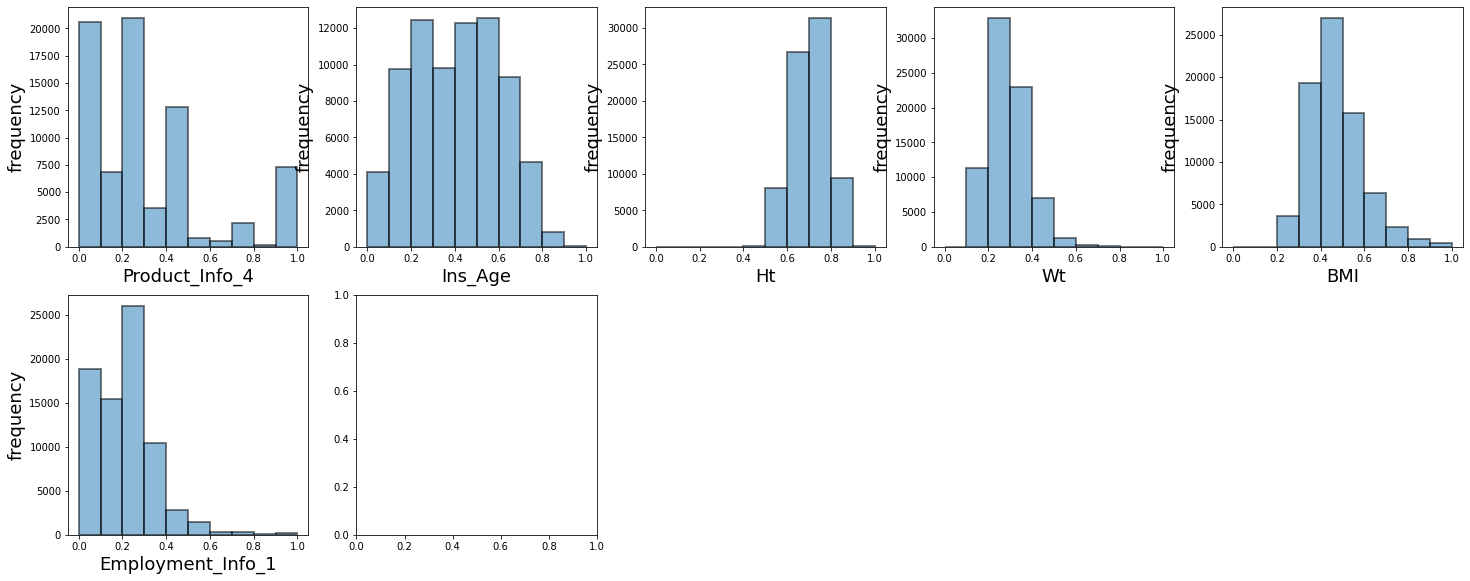

In [60]:
# display continuous data

def plot_histgrams(data):
    ncols = len(data.columns)
    fig = plt.figure(figsize=(5 * 5, 5 * (ncols // 5 + 1)))
    for i, col in enumerate(data.columns):
        X = data[col].dropna()
        plt.subplot(ncols // 5 + 1, 5, i + 1)
        plt.hist(X, bins=20, alpha=0.5, edgecolor="black", linewidth=2.0)
        plt.xlabel(col, fontsize=18)
        plt.ylabel("frequency", fontsize=18)
    fig.tight_layout()
    plt.show()

plot_histgrams(continuous_data)